In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 데이터셋 불러오기
df_original = pd.read_csv('vgames2.csv')

# 데이터셋 복사
df = df_original.copy()
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


# **데이터 전처리**

In [ ]:
# 필요없는 'Unnamed: 0' column 삭제
df.drop(columns='Unnamed: 0',inplace=True)
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales'],
      dtype='object')

In [ ]:
# 데이터셋 살펴보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df['Year'].isnull().sum()

271

In [ ]:
df['Genre'].isnull().sum()

50

In [ ]:
df[(df['Year'].isnull())&(df['Genre'].isnull())]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


가장 중점적으로 봐야할 column들인 'Year'과 'Genre'에서 결측치가 있는 행의 개수는 각각 271개와 50개이다.   
'Year'과 'Genre' column 둘 다 결측치가 있는 경우는 없고,
'Year' 또는 'Genre' column에서 결측치가 있는 경우는 321개이다.    
이는 전체에서 1.9%밖에 차지하지 않으므로 제거한다.

In [ ]:
df = df.dropna(axis='index',how='any', subset=['Year'])

In [ ]:
df['Year'].isnull().sum()

0

In [ ]:
df = df.dropna(axis='index',how='any', subset=['Genre'])

In [ ]:
df['Genre'].isnull().sum()

0

'Publisher' column의 결측치는 삭제하지 않고 'Unknown'으로 대체한다.

In [ ]:
df['Publisher'] = df['Publisher'].fillna('Unknown')

In [ ]:
df.isnull().sum().sum()

0

'Year' column은 실수형에서 정수형으로 바꿔준다.

In [ ]:
df['Year'] = df['Year'].round(0).astype(int)

In [ ]:
df['Year']

0        2008
1        2009
2        2010
3        2010
4        2010
         ... 
16593    2006
16594    2005
16595    2015
16596    2013
16597    1996
Name: Year, Length: 16277, dtype: int64

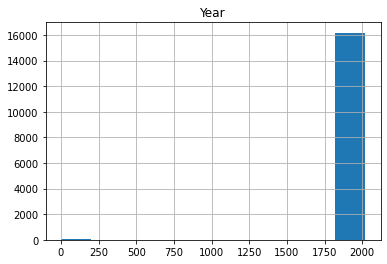

In [ ]:
df.hist(column='Year');

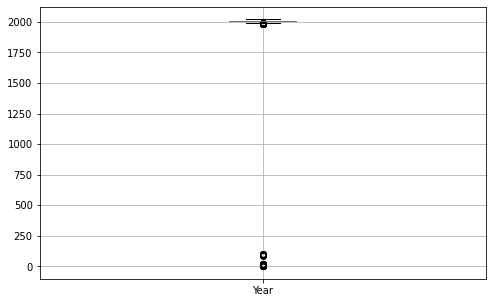

In [ ]:
plt.figure(figsize=(8,5))
df.boxplot(column='Year')
plt.show()

In [ ]:
df[df['Year'] < 100]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0,Shooter,Namco Bandai Games,0.01,0.01,0,0


'Year' column에서 19nn년 혹은 20nn년과 같이 4자리로 연도가 표시되어 있지 않고 두자릿수 혹은 한자릿수로 되어있는 연도들은 적절하게 1900또는 2000을 더해 연도를 맞춰준다.



In [ ]:
def change_year(x):
  if x < 23 :
    return x + 2000
  elif x > 23 and x < 100:
    return x + 1900
  else : 
    return x

df['Year'] = df['Year'].apply(change_year)
df['Year'].value_counts()

2009    1428
2008    1423
2010    1255
2007    1196
2011    1136
2006    1005
2005     939
2002     826
2003     774
2004     759
2012     654
2015     611
2014     582
2013     545
2001     480
1998     377
2000     348
2016     344
1999     336
1997     289
1996     262
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1989      17
1983      17
1990      16
1987      16
1988      15
1984      14
1985      14
1980       8
2017       3
2020       1
Name: Year, dtype: int64

In [ ]:
df[df['Year']==2020]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
6906,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,0.27,0K,0,0.02


2020년 자료는 하나인데다가 직접 검색해보니 원래는 2009년 출시 작품이라 현재를 2017년이라 가정하고 제거해주도록 함

In [ ]:
drop_2020 = df[df['Year']==2020].index
df.drop(drop_2020, inplace=True)

In [ ]:
df[df['Year']>2017]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


판매량 수치 정리하기(단위는 1K)

In [ ]:
def del_k_m(a):
  if a.endswith('K') == True:
    result = float(a.replace('K',''))
  elif a.endswith('M') == True:
    result = float(a.replace('M','')) * 1000
  else:
    result = float(a) * 1000
  return result

In [ ]:
df['NA_Sales'] = df['NA_Sales'].apply(del_k_m)
df['EU_Sales'] = df['EU_Sales'].apply(del_k_m)
df['JP_Sales'] = df['JP_Sales'].apply(del_k_m)
df['Other_Sales'] = df['Other_Sales'].apply(del_k_m)

In [ ]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150.0,40.0,0.0,10.0
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10.0,0.0,0.0,0.0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440.0,190.0,30.0,130.0
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50.0,50.0,250.0,30.0


# **가상 선호하는 장르는?**

**각 국가별 선호하는 장르**

In [ ]:
graph_for_genre = df[['Genre', 'NA_Sales','EU_Sales', 'JP_Sales', 'Other_Sales']]
graph_for_genre_group = graph_for_genre.groupby(['Genre']).sum()
graph_for_genre_table = graph_for_genre_group.reset_index()
graph_for_genre_table

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858780.0,513640.0,156610.0,183990.0
1,Adventure,101920.0,63710.0,51890.0,16700.0
2,Fighting,220350.0,99900.0,87140.0,36150.0
3,Misc,400290.0,210200.0,104180.0,72740.0
4,Platform,445380.0,200650.0,130530.0,51450.0
5,Puzzle,121580.0,50480.0,56240.0,12440.0
6,Racing,354700.0,235030.0,56320.0,76510.0
7,Role-Playing,318760.0,183100.0,342930.0,56730.0
8,Shooter,574480.0,310230.0,38180.0,101860.0
9,Simulation,181160.0,113170.0,63540.0,31300.0


In [ ]:
genre_melted = pd.melt(graph_for_genre_table, id_vars=['Genre'], value_vars=graph_for_genre_table[1:], var_name='Sales_Country', value_name='Sales_Amount')
genre_melted.head()

,Genre,Sales_Country,Sales_Amount
0,Action,NA_Sales,858780.0
1,Adventure,NA_Sales,101920.0
2,Fighting,NA_Sales,220350.0
3,Misc,NA_Sales,400290.0
4,Platform,NA_Sales,445380.0


<function matplotlib.pyplot.show(close=None, block=None)>

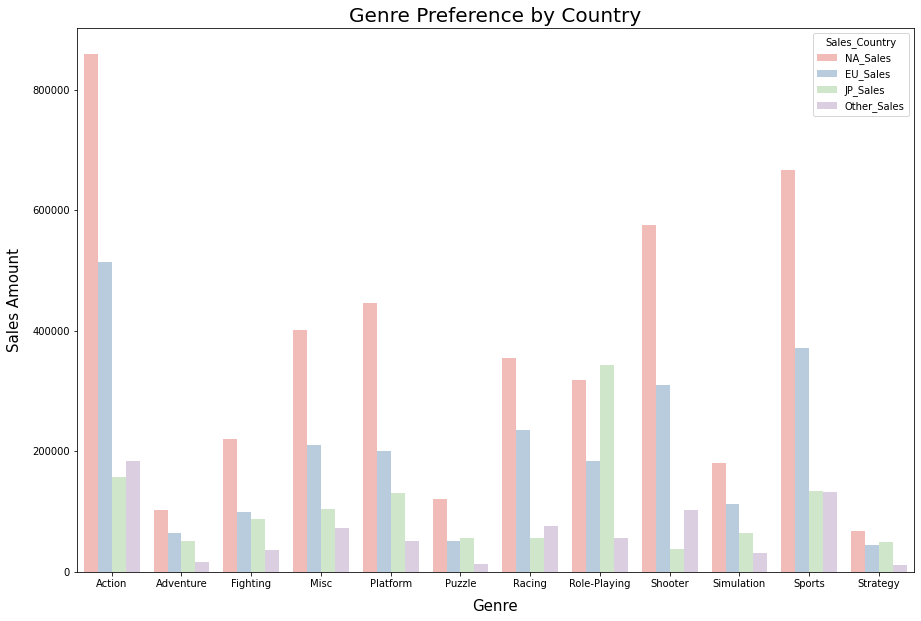

In [ ]:
palette1 = sns.color_palette("Pastel1",4)
sns.set_palette(palette1)
plt.figure(figsize=(15,10))
sns.barplot(data=genre_melted, x='Genre', y='Sales_Amount', hue='Sales_Country')
plt.xlabel('Genre', size=15, labelpad=10)
plt.ylabel('Sales Amount', size=15, labelpad=10)
plt.title('Genre Preference by Country', fontsize=20)
plt.show

국가별로 가장 많이 팔린 게임 장르 rank로 heatmap 그리기(숫자가 작을 수록 판매량 높음)

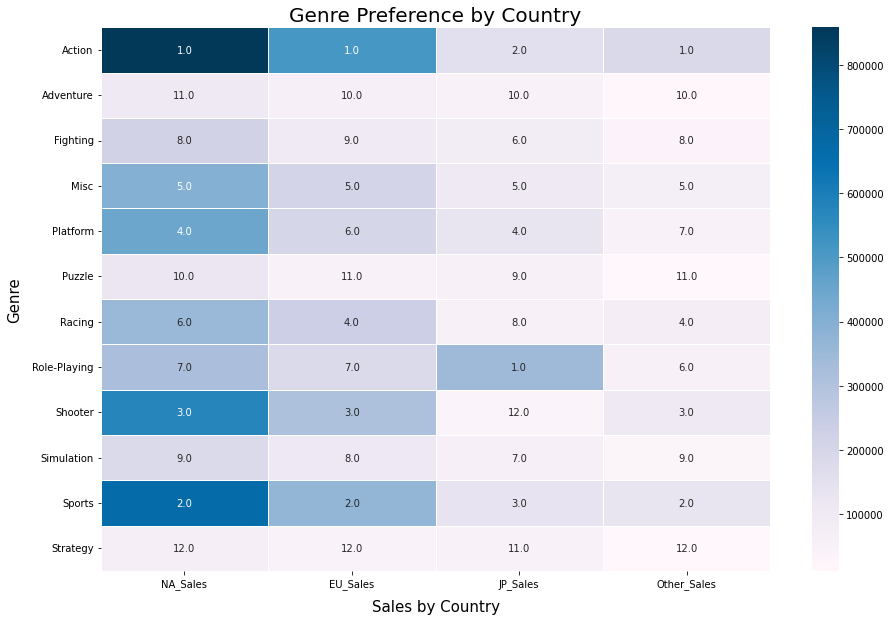

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(graph_for_genre_group, annot=graph_for_genre_group.rank(axis='rows', ascending=False), linewidths=.5, cmap='PuBu', fmt='.1f')
plt.title('Genre Preference by Country', fontsize=20)
plt.xlabel('Sales by Country', size=15, labelpad=10)
plt.ylabel('Genre', size=15, labelpad=10)
plt.show()

NA_Sales, EU_Sales, JP_Sales, Other_Sales를 모두 더한 Total_Sales column만들기

In [ ]:
df['Total_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0


**그 해에 가장 출시량이 많은 장르**

In [ ]:
year_genre_max = df.groupby(['Year','Genre']).size().reset_index(name='count')
count_max = year_genre_max.groupby('Year')['count'].transform(max) == year_genre_max['count']
genre_max_year = year_genre_max[count_max].reset_index(drop=True)
genre_max_year

,Year,Genre,count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Puzzle,3
5,1984,Racing,3
6,1984,Shooter,3
7,1985,Platform,4
8,1985,Puzzle,4
9,1986,Action,6


중복값 제거 

In [ ]:
genre_max_year.duplicated(subset=['Year','count'])

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
11    False
12    False
13    False
14    False
15     True
16     True
17    False
18    False
19    False
20     True
21    False
22     True
23    False
24     True
25     True
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
dtype: bool

In [ ]:
genre_max_year = genre_max_year.drop_duplicates(subset=['Year','count'], keep='last').reset_index(drop=True)
genre_max_year.head()

,Year,Genre,count
0,1980,Misc,4
1,1981,Action,25
2,1982,Action,18
3,1983,Action,7
4,1984,Shooter,3


In [ ]:
genre = genre_max_year['Genre'].values
genre

array(['Misc', 'Action', 'Action', 'Action', 'Shooter', 'Puzzle',
       'Platform', 'Sports', 'Platform', 'Puzzle', 'Sports', 'Sports',
       'Fighting', 'Platform', 'Sports', 'Sports', 'Sports', 'Sports',
       'Sports', 'Sports', 'Sports', 'Sports', 'Sports', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Action', 'Action', 'Action', 'Action', 'Action',
       'Action', 'Role-Playing'], dtype=object)

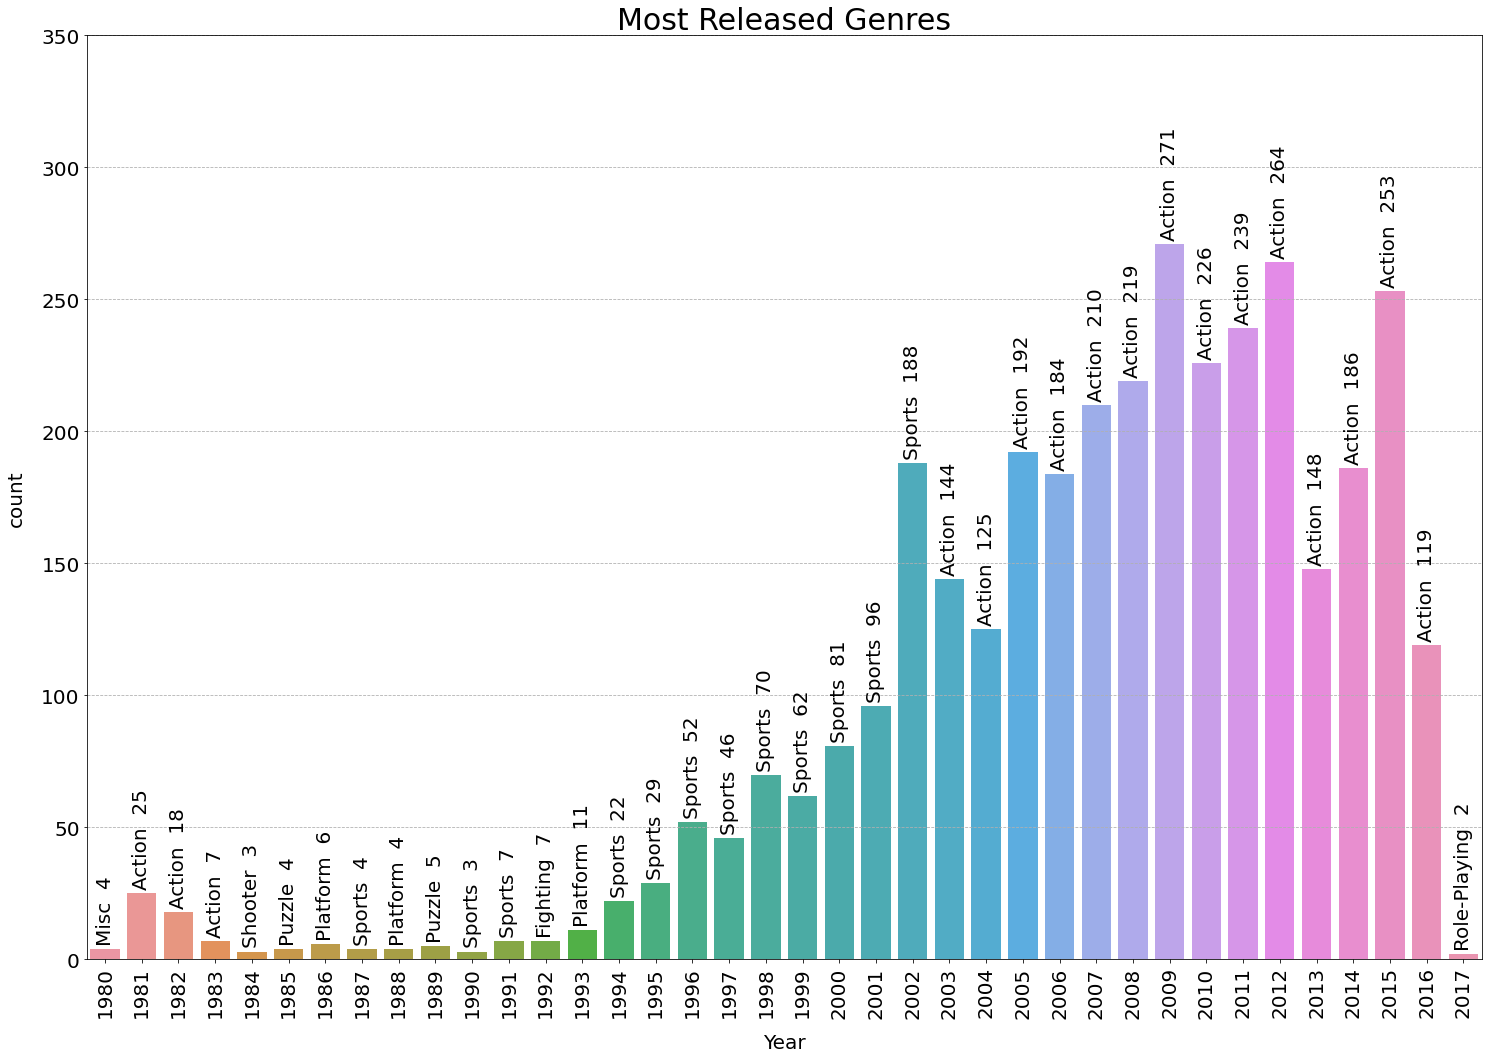

In [ ]:
plt.figure(figsize=(25,17))
ax = sns.barplot(data = genre_max_year, x='Year', y='count')
idx = 0
for i in genre_max_year['count']:
  ax.text(x=idx, y=i+3, s=str(genre[idx] + '  ' + str(i)), size=20, rotation=90, ha='center')
  idx+=1
plt.ylim([0,350])
plt.grid(True,axis='y',linestyle='--')
plt.xlabel('Year', fontsize = 20, labelpad=15)
plt.ylabel('count', fontsize = 20, labelpad=15)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.title('Most Released Genres', fontsize=30)
plt.show()

글씨가 가로로있는 것이 가독성이 떨어져 수평 막대그래프로 변경

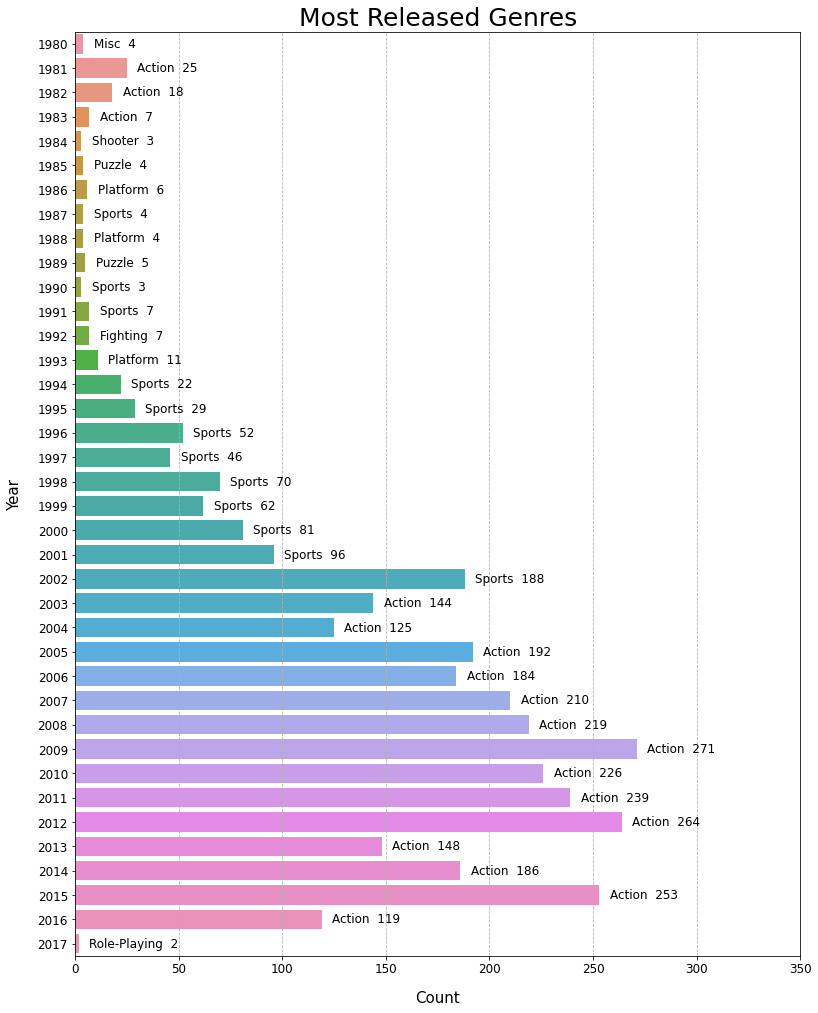

In [ ]:
plt.figure(figsize=(13,17))
ax = sns.barplot(data = genre_max_year, x='count', y='Year', orient='h')
idx = 0
for i in genre_max_year['count']:
  ax.text(x=i+5, y=idx , s=str(genre[idx] + '  ' + str(i)), size=12, va='center')
  idx+=1
plt.xlim([0,350])
plt.grid(True,axis='x',linestyle='--')
plt.xlabel('Count', fontsize = 15, labelpad=15)
plt.ylabel('Year', fontsize = 15, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Most Released Genres', fontsize=25)
plt.show()

**그 해 가장 많이 출고된(판매된) 장르**

In [ ]:
year_sales_max = df.groupby(['Year','Genre'])['Total_Sales'].sum().reset_index()
same = year_sales_max['Total_Sales'] == year_sales_max.groupby('Year')['Total_Sales'].transform(max)
year_max_sales = year_sales_max[same]
year_max_sales.head()

,Year,Genre,Total_Sales
3,1980,Shooter,7070.0
4,1981,Action,14790.0
14,1982,Puzzle,10040.0
21,1983,Platform,6930.0
30,1984,Shooter,31100.0


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


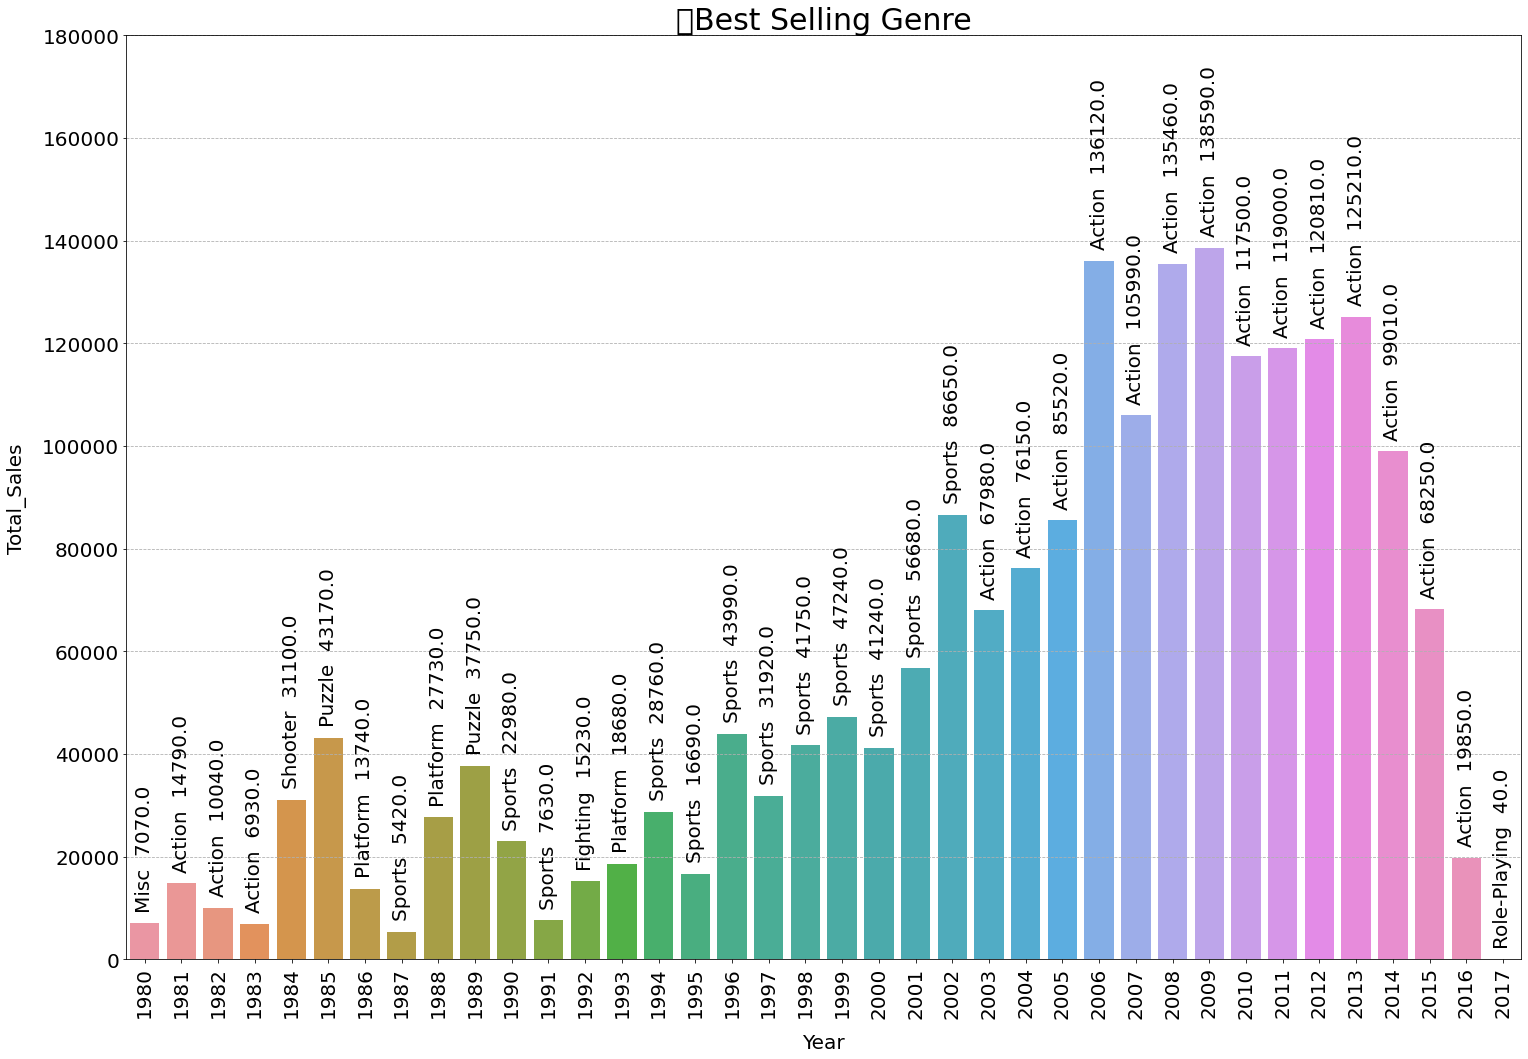

In [ ]:
plt.figure(figsize=(25,17))
ax2 = sns.barplot(data = year_max_sales, x='Year', y='Total_Sales')
idx2 = 0
for j in year_max_sales['Total_Sales']:
  ax2.text(x=idx2, y=j+3000, s=str(genre[idx2] + '  ' + str(round(j,0))), size=20, rotation=90, ha='center')
  idx2 += 1
plt.ylim([0,180000])
plt.grid(True,axis='y',linestyle='--')
plt.xlabel('Year', fontsize = 20, labelpad=15)
plt.ylabel('Total_Sales', fontsize = 20, labelpad=15)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.title('Best Selling Genre', fontsize=30)
plt.show()

수평막대그래프

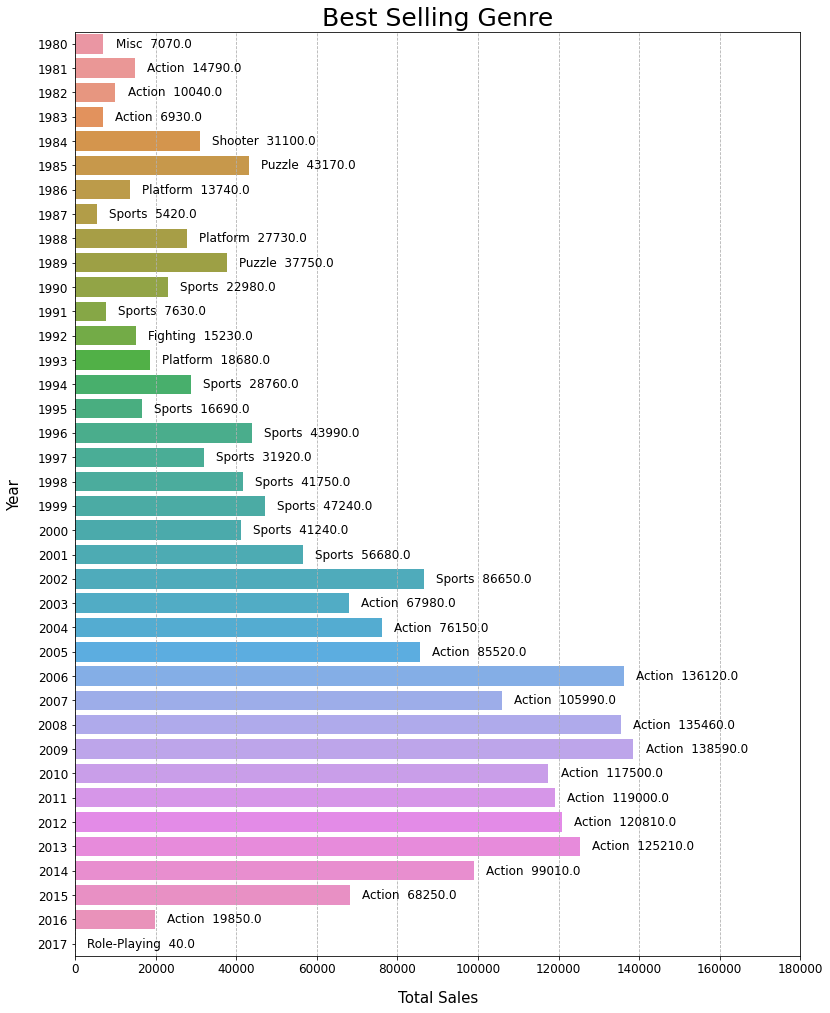

In [ ]:
plt.figure(figsize=(13,17))
ax2 = sns.barplot(data = year_max_sales, x='Total_Sales', y='Year', orient='h')
idx2 = 0
for j in year_max_sales['Total_Sales']:
  ax2.text(x=j+3000, y=idx2, s=str(genre[idx2] + '  ' + str(round(j,0))), size=12, va='center')
  idx2 += 1
plt.xlim([0,180000])
plt.grid(True,axis='x',linestyle='--')
plt.xlabel('Total Sales', fontsize = 15, labelpad=15)
plt.ylabel('Year', fontsize = 15, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Best Selling Genre', fontsize=25)
plt.show()

# **가장 선호하는 플랫폼은?**

플랫폼들 중 휴대용과 가정용을 구분한다
 (가정용은 0 휴대용은 1로 구분)

In [ ]:
portable_dict = {'2600':0, 'NES':0, 'GG':1,'GEN':0,'SCD':0,'SNES':0,'NG':0,'3DO':0,'TG16':0,'GB':1,'PCFX':0,'SAT':0,'PS':0,'N64':0,'DC':0,'WS':1,'GBA':1,'GC':0,'XB':0,'PS2':0,'DS':1,'PSP':1,'PC':0,'Wii':0,'X360':0,'PS3':0,'3DS':1,'WiiU':0,'PSV':1,'XOne':0,'PS4':0}
df['Portable'] = df['Platform'].map(portable_dict)
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales,Portable
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40.0,0.0,0.0,0.0,40.0,1
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170.0,0.0,0.0,10.0,180.0,0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20.0,0.0,20.0,1
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40.0,0.0,0.0,0.0,40.0,1
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120.0,90.0,0.0,40.0,250.0,0


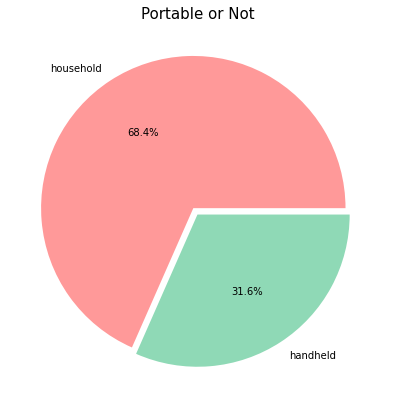

In [ ]:
plt.figure(figsize=(7,7))
labels=['household','handheld']
explode = (0.05,0)
colors=['#ff9999','#8fd9b6']
plt.pie(df['Portable'].value_counts(normalize=True), labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Portable or Not', fontsize=15)
plt.show()

column 순서 정리

In [ ]:
df = df[['Year','Name','Publisher', 'Genre','Platform','Portable','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
df.head()

,Year,Name,Publisher,Genre,Platform,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2008,Candace Kane's Candy Factory,Destineer,Action,DS,1,40.0,0.0,0.0,0.0,40.0
1,2009,The Munchables,Namco Bandai Games,Action,Wii,0,170.0,0.0,0.0,10.0,180.0
2,2010,Otome wa Oanesama Boku ni Koi Shiteru Portable,Alchemist,Adventure,PSP,1,0.0,0.0,20.0,0.0,20.0
3,2010,Deal or No Deal: Special Edition,Zoo Games,Misc,DS,1,40.0,0.0,0.0,0.0,40.0
4,2010,Ben 10 Ultimate Alien: Cosmic Destruction,D3Publisher,Platform,PS3,0,120.0,90.0,0.0,40.0,250.0


플랫폼 이름을 줄임말 말고 풀네임으로 바꾼다

In [ ]:
df.replace({'Platform':{'2600':'Atari 2600', 'NES':'Nintendo Entertainment System', 'GG':'GameGear','GEN':'Sega Genesis','SCD':'Sega CD','SNES':'Super Nintendo Entertainment System','NG':'Neo Geo','3DO':'3DO Interactive Multiplayer','TG16':'TurboGrafx-16','GB':'Game Boy','PCFX':'PC-FX','SAT':'Sega Saturn','PS':'PlayStation','N64':'Nintendo 64','DC':'Dreamcast','WS':'WonderSwan','GBA':'Game Boy Advance','GC':'GameCube','XB':'Xbox','PS2':'PlayStation2','DS':'Nintendo DS','PSP':'PlayStation Portable','PC':'PC','Wii':'Nintendo Wii','X360':'Xbox 360','PS3':'PlayStation3','3DS':'Nintendo 3DS','WiiU':'Nintendo Wii U','PSV':'PlayStation Vita','XOne':'Xbox One','PS4':'PlayStation4'}}, inplace=True)
df.head()

,Year,Name,Publisher,Genre,Platform,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2008,Candace Kane's Candy Factory,Destineer,Action,Nintendo DS,1,40.0,0.0,0.0,0.0,40.0
1,2009,The Munchables,Namco Bandai Games,Action,Nintendo Wii,0,170.0,0.0,0.0,10.0,180.0
2,2010,Otome wa Oanesama Boku ni Koi Shiteru Portable,Alchemist,Adventure,PlayStation Portable,1,0.0,0.0,20.0,0.0,20.0
3,2010,Deal or No Deal: Special Edition,Zoo Games,Misc,Nintendo DS,1,40.0,0.0,0.0,0.0,40.0
4,2010,Ben 10 Ultimate Alien: Cosmic Destruction,D3Publisher,Platform,PlayStation3,0,120.0,90.0,0.0,40.0,250.0


**플랫폼별 판매량**

In [ ]:
platform_sales = df[['Platform','NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales']]
platform_sales_group = platform_sales.groupby('Platform').sum().reset_index()
platform_sales_group

,Platform,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,3DO Interactive Multiplayer,0.0,0.0,100.0,0.0,100.0
1,Atari 2600,80320.0,4830.0,0.0,830.0,85980.0
2,Dreamcast,5430.0,1690.0,8560.0,270.0,15950.0
3,Game Boy,113640.0,47510.0,85120.0,8160.0,254430.0
4,Game Boy Advance,183950.0,74530.0,46560.0,7610.0,312650.0
5,GameCube,131740.0,38270.0,20900.0,5110.0,196020.0
6,GameGear,0.0,0.0,40.0,0.0,40.0
7,Neo Geo,0.0,0.0,1440.0,0.0,1440.0
8,Nintendo 3DS,72860.0,54250.0,92960.0,11760.0,231830.0
9,Nintendo 64,138340.0,40670.0,33470.0,4280.0,216760.0


In [ ]:
platform_melt = pd.melt(platform_sales_group, id_vars=['Platform'], value_vars=['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Total_Sales'], var_name='Sales_Country', value_name='Sales')
platform_melt

,Platform,Sales_Country,Sales
0,3DO Interactive Multiplayer,NA_Sales,0.0
1,Atari 2600,NA_Sales,80320.0
2,Dreamcast,NA_Sales,5430.0
3,Game Boy,NA_Sales,113640.0
4,Game Boy Advance,NA_Sales,183950.0
...,...,...,...
150,TurboGrafx-16,Total_Sales,160.0
151,WonderSwan,Total_Sales,1420.0
152,Xbox,Total_Sales,247300.0
153,Xbox 360,Total_Sales,968600.0


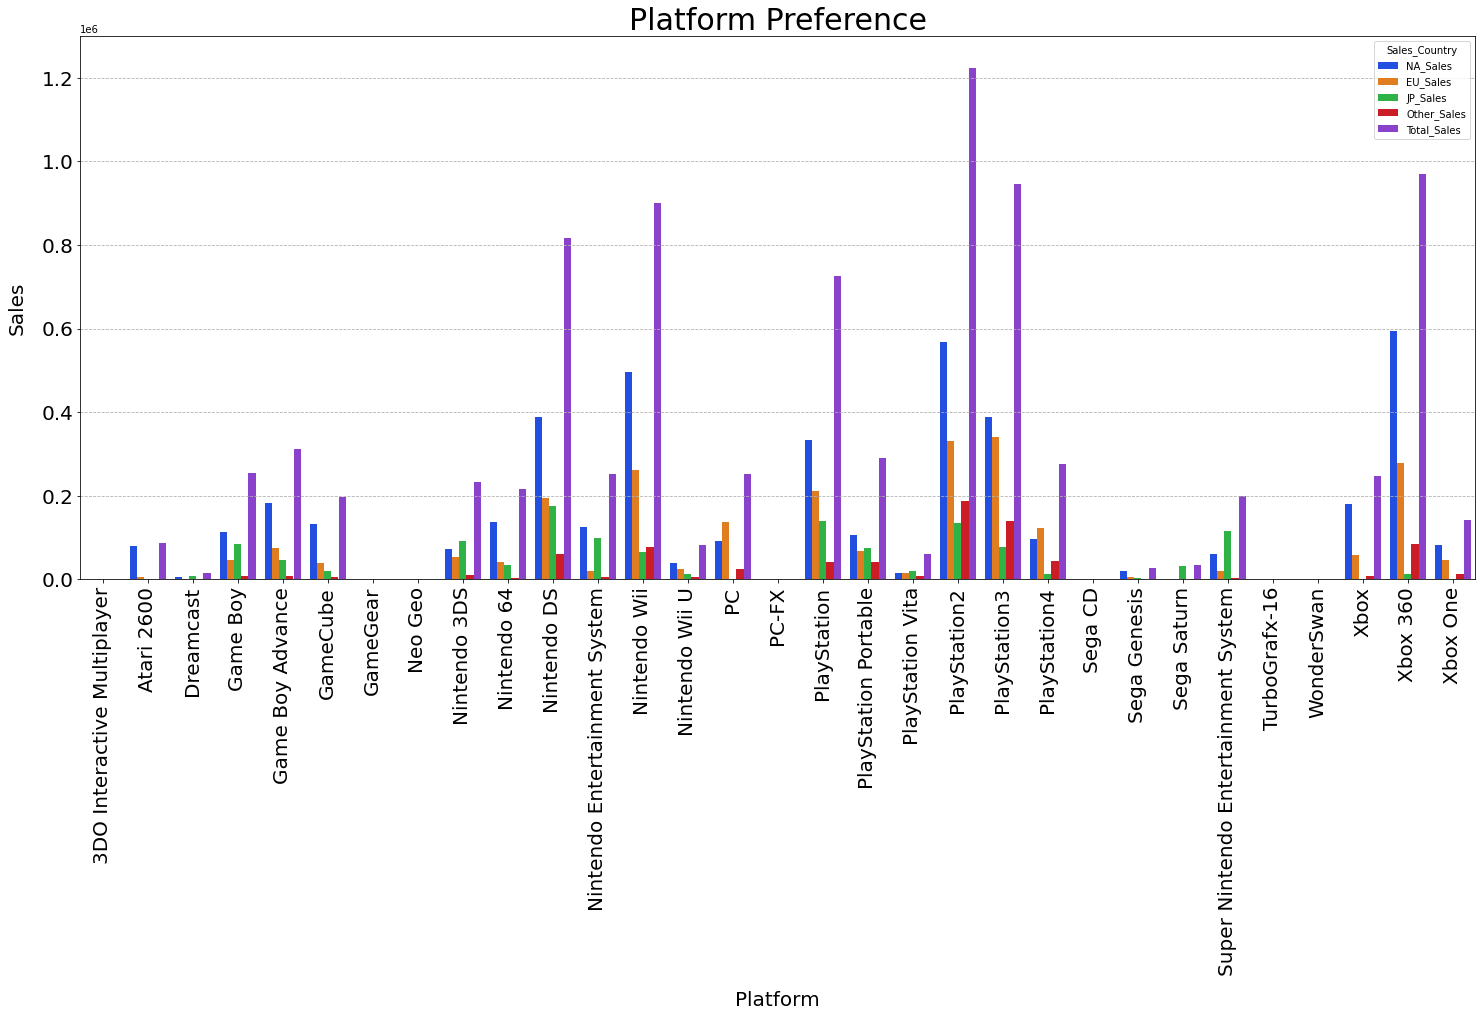

In [ ]:
palette8 = sns.color_palette("bright", 5)
sns.set_palette(palette8)
plt.figure(figsize=(25,10))
sns.barplot(data = platform_melt, x = 'Platform', y = 'Sales', hue='Sales_Country')
plt.ylim([0,1300000])
plt.grid(True,axis='y',linestyle='--')
plt.xlabel('Platform', fontsize = 20, labelpad=15)
plt.ylabel('Sales', fontsize = 20, labelpad=15)
plt.xticks(fontsize=20,rotation=90)
plt.yticks(fontsize=20)
plt.title('Platform Preference', fontsize=30)
plt.show()

수평막대그래프

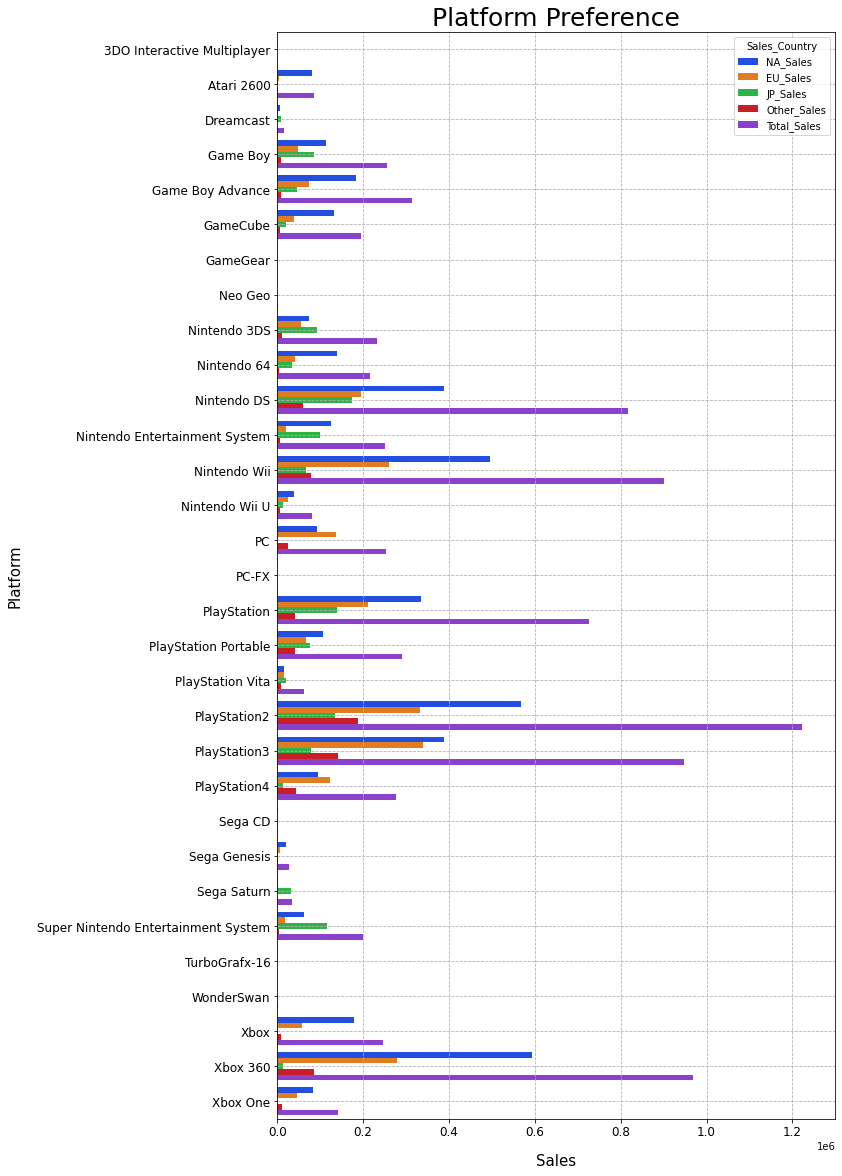

In [ ]:
palette8 = sns.color_palette("bright", 5)
sns.set_palette(palette8)
plt.figure(figsize=(10,20))
sns.barplot(data = platform_melt, x = 'Sales', y = 'Platform', hue='Sales_Country', orient='h')
plt.xlim([0,1300000])
plt.grid(True,axis='both',linestyle='--')
plt.xlabel('Sales', fontsize = 15, labelpad=15)
plt.ylabel('Platform', fontsize = 15, labelpad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Platform Preference', fontsize=25)
plt.show()

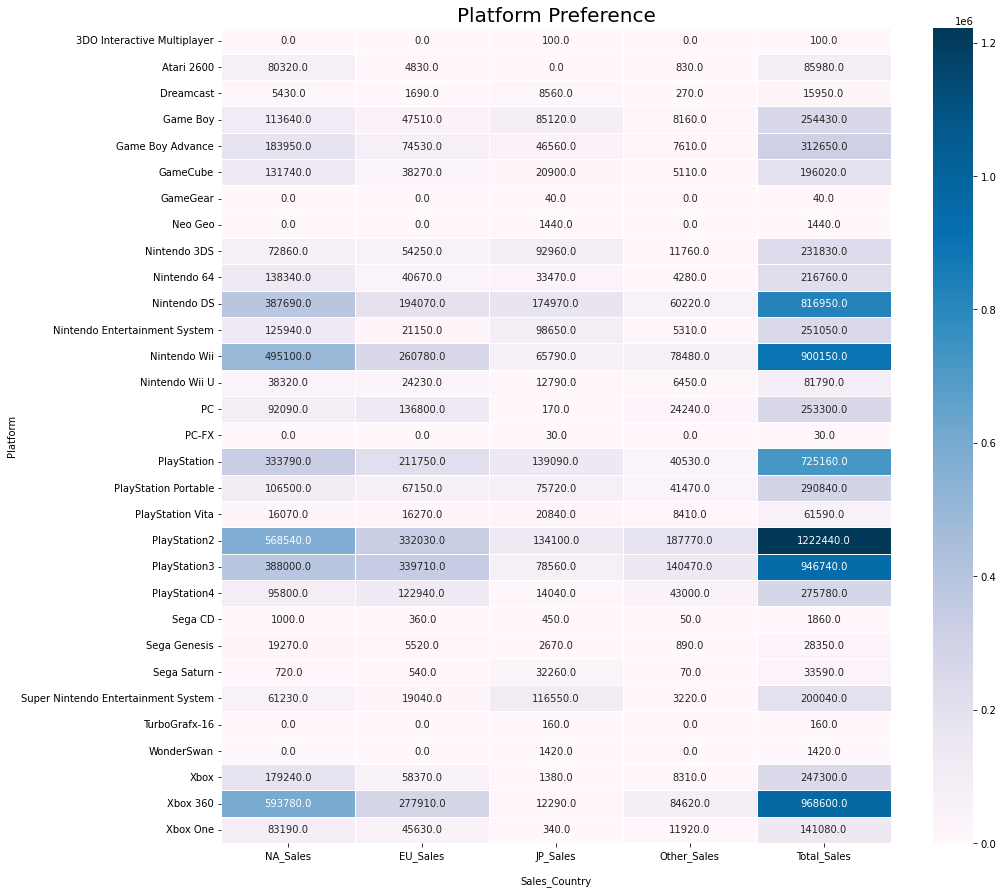

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(platform_sales.groupby('Platform').sum(), annot=True, linewidths=.5, cmap='PuBu', fmt='.1f')
plt.title('Platform Preference', fontsize=20)
plt.xlabel('Sales_Country', fontsize = 10, labelpad=15)
plt.show()

# **역대 가장 인기있는 게임은?**

**역대 가장 인기 있는 게임 best10**

In [ ]:
best_10_sales = df.loc[df['Total_Sales'].sort_values(ascending=False).index].head(10)
best_10_sales = best_10_sales.sort_values(by=['Total_Sales']).reset_index(drop=True)
best_10_sales

,Year,Name,Publisher,Genre,Platform,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1984,Duck Hunt,Nintendo,Shooter,Nintendo Entertainment System,0,26930.0,630.0,280.0,470.0,28310.0
1,2009,New Super Mario Bros. Wii,Nintendo,Platform,Nintendo Wii,0,14590.0,7060.0,4700.0,2260.0,28610.0
2,2006,Wii Play,Nintendo,Misc,Nintendo Wii,0,14030.0,9200.0,2930.0,2850.0,29010.0
3,2006,New Super Mario Bros.,Nintendo,Platform,Nintendo DS,1,11380.0,9230.0,6500.0,2900.0,30010.0
4,1989,Tetris,Nintendo,Puzzle,Game Boy,1,23200.0,2260.0,4220.0,580.0,30260.0
5,1996,Pokemon Red/Pokemon Blue,Nintendo,Role-Playing,Game Boy,1,11270.0,8890.0,10220.0,1000.0,31380.0
6,2009,Wii Sports Resort,Nintendo,Sports,Nintendo Wii,0,15750.0,11010.0,3280.0,2960.0,33000.0
7,2008,Mario Kart Wii,Nintendo,Racing,Nintendo Wii,0,15850.0,12880.0,3790.0,3310.0,35830.0
8,1985,Super Mario Bros.,Nintendo,Platform,Nintendo Entertainment System,0,29080.0,3580.0,6810.0,770.0,40240.0
9,2006,Wii Sports,Nintendo,Sports,Nintendo Wii,0,41490.0,29020.0,3770.0,8460.0,82740.0


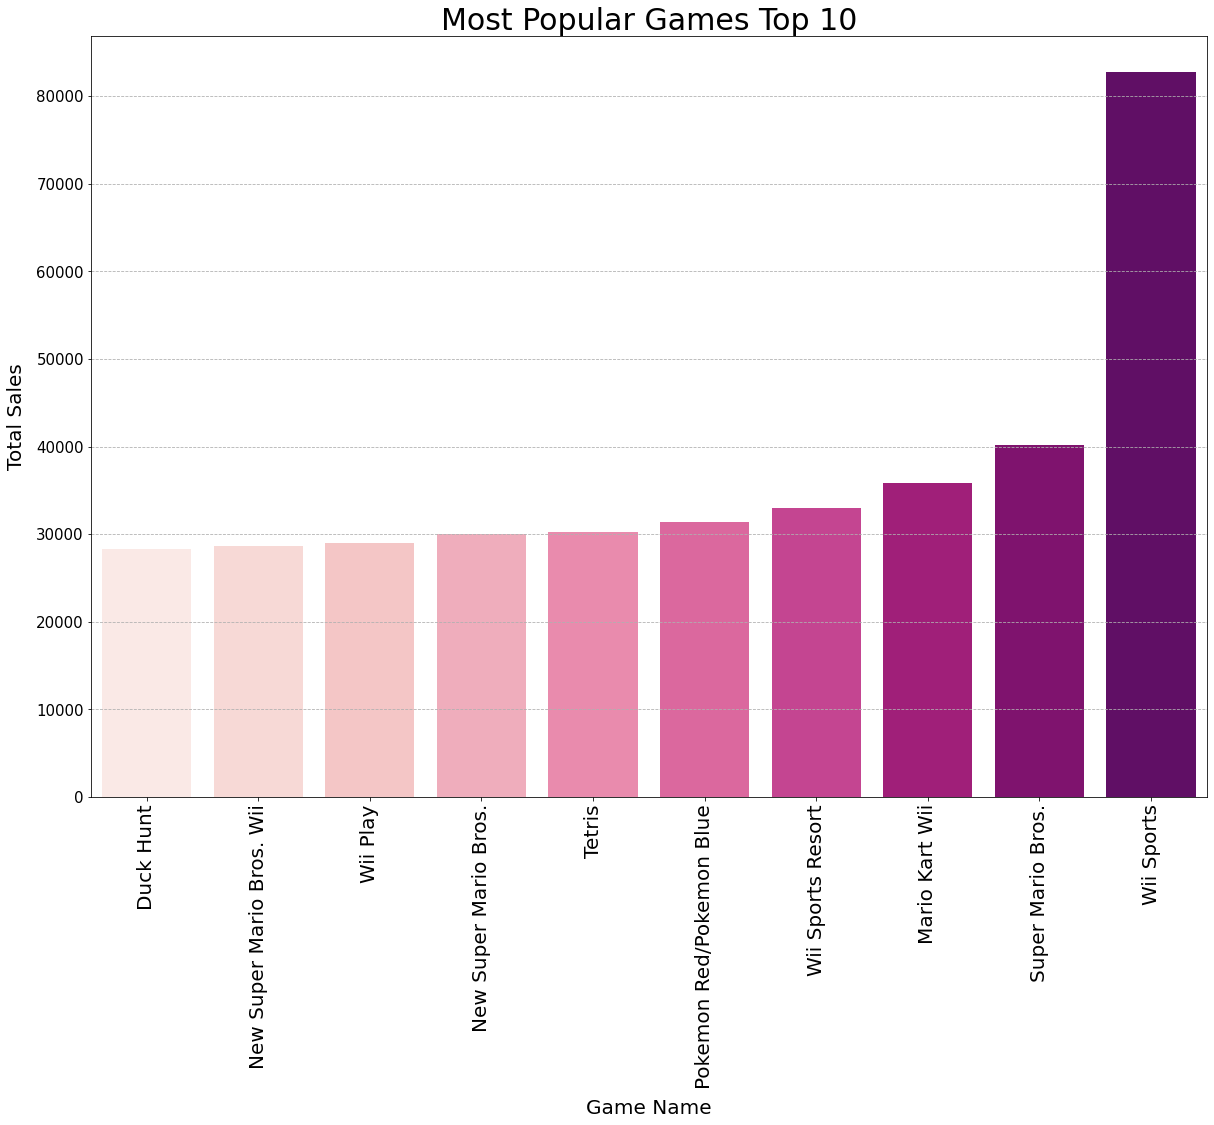

In [ ]:
palette2 = sns.color_palette("RdPu", 10)
plt.figure(figsize=(20,14))
sns.set_palette(palette2)
sns.barplot(data=best_10_sales, x='Name', y='Total_Sales')
plt.grid(True,axis='y', linestyle='--')
plt.xlabel('Game Name', size=20, labelpad=10)
plt.ylabel('Total Sales', size=20, labelpad=10)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=15)
plt.title('Most Popular Games Top 10',fontsize=30)
plt.show()

수평막대그래프

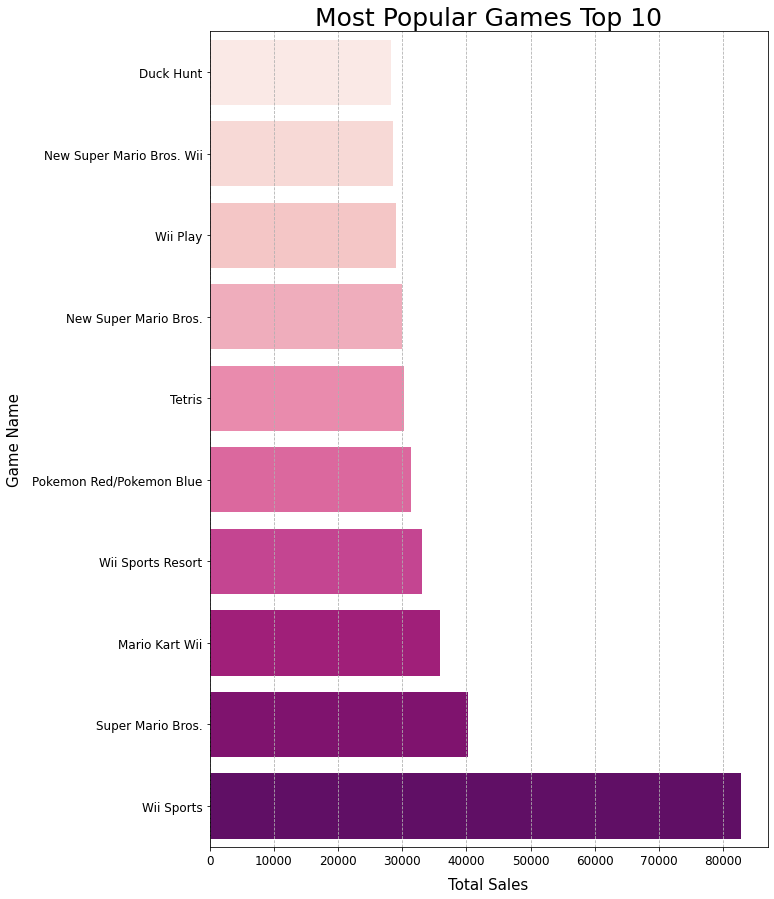

In [ ]:
palette2 = sns.color_palette("RdPu", 10)
plt.figure(figsize=(10,15))
sns.set_palette(palette2)
sns.barplot(data=best_10_sales, x='Total_Sales', y='Name', orient='h')
plt.grid(True,axis='x', linestyle='--')
plt.xlabel('Total Sales', size=15, labelpad=10)
plt.ylabel('Game Name', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Most Popular Games Top 10',fontsize=25)
plt.show()

**북미 역대 인기 게임 best10**

In [ ]:
best_10_sales_NA = df.loc[df['NA_Sales'].sort_values(ascending=False).index].head(10)
best_10_sales_NA = best_10_sales_NA.sort_values(by=['NA_Sales']).reset_index(drop=True)
best_10_sales_NA

,Year,Name,Publisher,Genre,Platform,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1990,Super Mario World,Nintendo,Platform,Super Nintendo Entertainment System,0,12780.0,3750.0,3540.0,550.0,20620.0
1,2006,Wii Play,Nintendo,Misc,Nintendo Wii,0,14030.0,9200.0,2930.0,2850.0,29010.0
2,2009,New Super Mario Bros. Wii,Nintendo,Platform,Nintendo Wii,0,14590.0,7060.0,4700.0,2260.0,28610.0
3,2010,Kinect Adventures!,Microsoft Game Studios,Misc,Xbox 360,0,14970.0,4940.0,240.0,1670.0,21820.0
4,2009,Wii Sports Resort,Nintendo,Sports,Nintendo Wii,0,15750.0,11010.0,3280.0,2960.0,33000.0
5,2008,Mario Kart Wii,Nintendo,Racing,Nintendo Wii,0,15850.0,12880.0,3790.0,3310.0,35830.0
6,1989,Tetris,Nintendo,Puzzle,Game Boy,1,23200.0,2260.0,4220.0,580.0,30260.0
7,1984,Duck Hunt,Nintendo,Shooter,Nintendo Entertainment System,0,26930.0,630.0,280.0,470.0,28310.0
8,1985,Super Mario Bros.,Nintendo,Platform,Nintendo Entertainment System,0,29080.0,3580.0,6810.0,770.0,40240.0
9,2006,Wii Sports,Nintendo,Sports,Nintendo Wii,0,41490.0,29020.0,3770.0,8460.0,82740.0


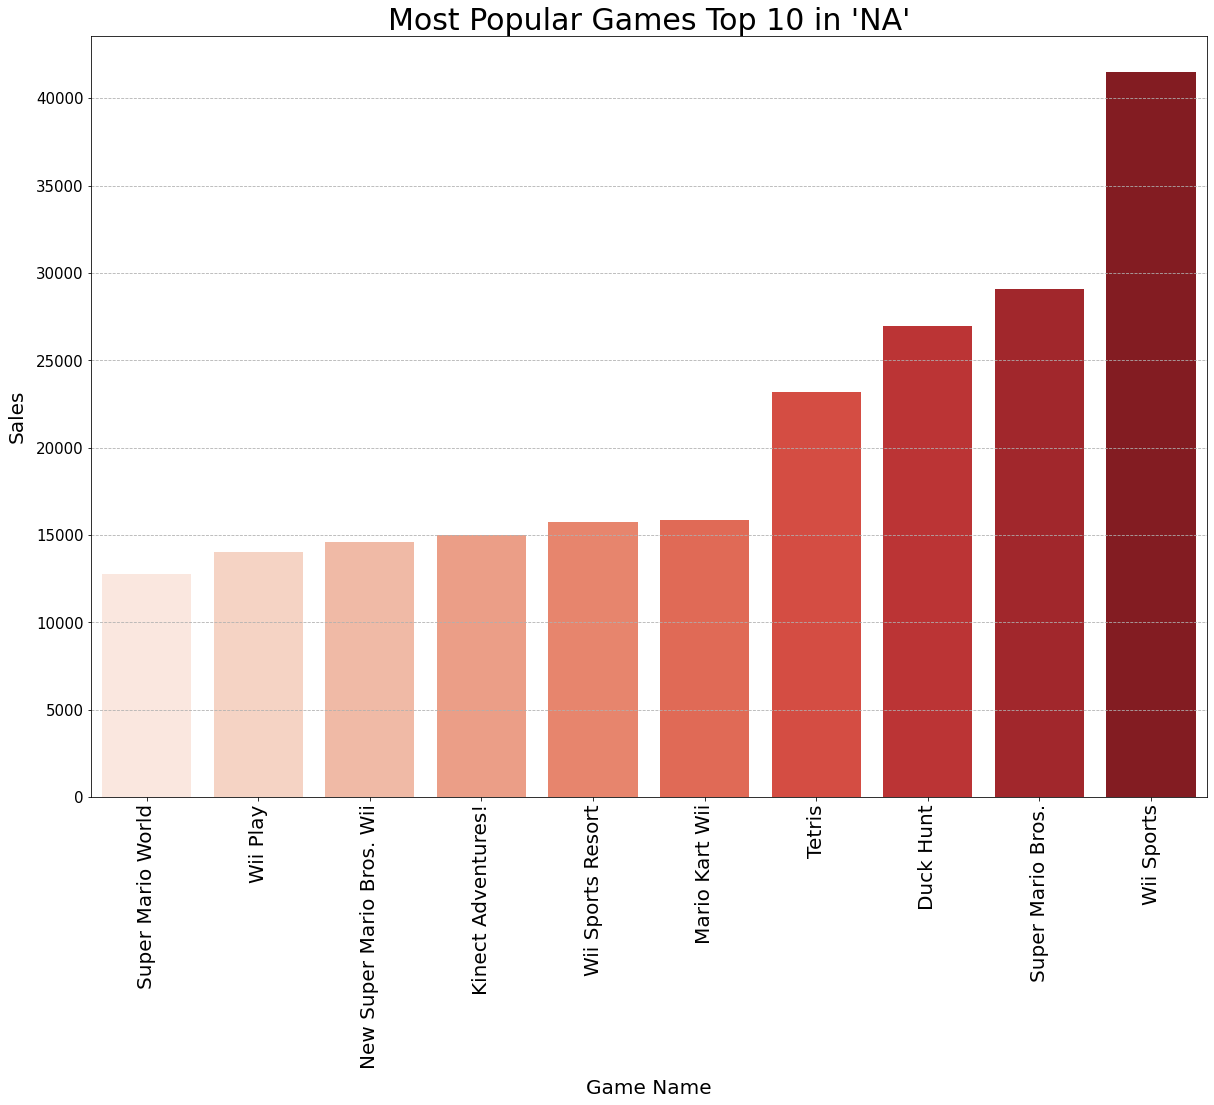

In [ ]:
palette3 = sns.color_palette("Reds", 10)
plt.figure(figsize=(20,14))
sns.set_palette(palette3)
sns.barplot(data=best_10_sales_NA, x='Name', y='NA_Sales')
plt.grid(True, axis='y', linestyle='--')
plt.xlabel('Game Name', size=20, labelpad=10)
plt.ylabel('Sales', size=20, labelpad=10)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=15)
plt.title("Most Popular Games Top 10 in 'NA'",fontsize=30)
plt.show()

수평막대그래프

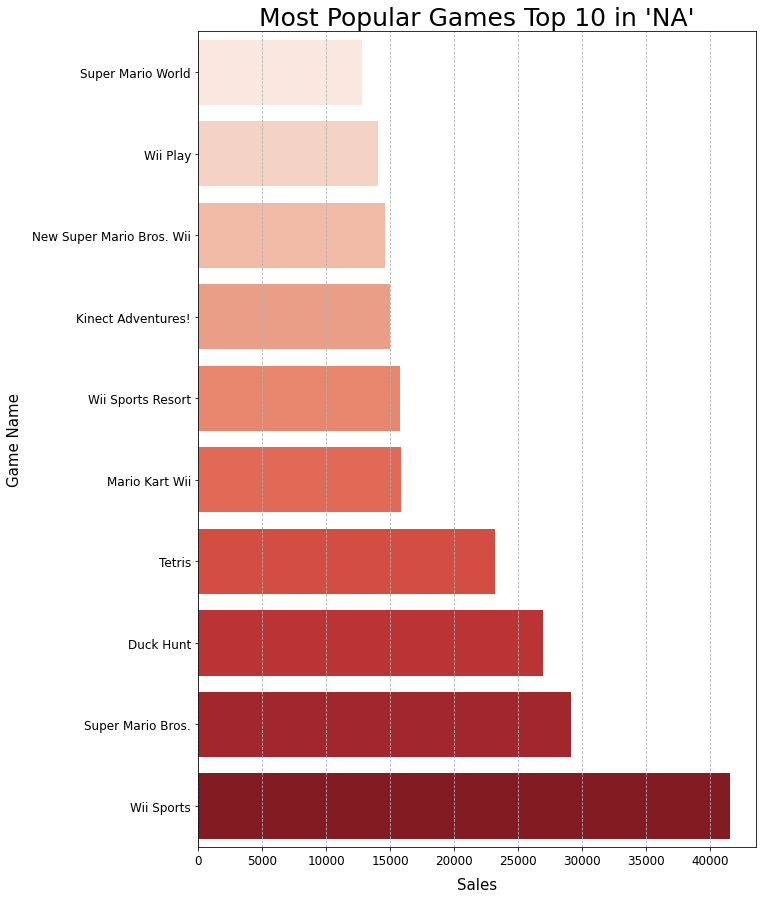

In [ ]:
palette3 = sns.color_palette("Reds", 10)
plt.figure(figsize=(10,15))
sns.set_palette(palette3)
sns.barplot(data=best_10_sales_NA, x='NA_Sales', y='Name', orient='h')
plt.grid(True, axis='x', linestyle='--')
plt.xlabel('Sales', size=15, labelpad=10)
plt.ylabel('Game Name', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most Popular Games Top 10 in 'NA'",fontsize=25)
plt.show()

**유럽 역대 인기 게임 best10**

In [ ]:
best_10_sales_EU = df.loc[df['EU_Sales'].sort_values(ascending=False).index].head(10)
best_10_sales_EU = best_10_sales_EU.sort_values(by=['EU_Sales']).reset_index(drop=True)
best_10_sales_EU

,Year,Name,Publisher,Genre,Platform,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2009,Wii Fit Plus,Nintendo,Sports,Nintendo Wii,0,9090.0,8590.0,2530.0,1790.0,22000.0
1,1996,Pokemon Red/Pokemon Blue,Nintendo,Role-Playing,Game Boy,1,11270.0,8890.0,10220.0,1000.0,31380.0
2,2006,Wii Play,Nintendo,Misc,Nintendo Wii,0,14030.0,9200.0,2930.0,2850.0,29010.0
3,2006,New Super Mario Bros.,Nintendo,Platform,Nintendo DS,1,11380.0,9230.0,6500.0,2900.0,30010.0
4,2005,Brain Age: Train Your Brain in Minutes a Day,Nintendo,Misc,Nintendo DS,1,4750.0,9260.0,4160.0,2050.0,20220.0
5,2013,Grand Theft Auto V,Take-Two Interactive,Action,PlayStation3,0,7010.0,9270.0,970.0,4140.0,21390.0
6,2005,Nintendogs,Nintendo,Simulation,Nintendo DS,1,9070.0,11000.0,1930.0,2750.0,24750.0
7,2009,Wii Sports Resort,Nintendo,Sports,Nintendo Wii,0,15750.0,11010.0,3280.0,2960.0,33000.0
8,2008,Mario Kart Wii,Nintendo,Racing,Nintendo Wii,0,15850.0,12880.0,3790.0,3310.0,35830.0
9,2006,Wii Sports,Nintendo,Sports,Nintendo Wii,0,41490.0,29020.0,3770.0,8460.0,82740.0


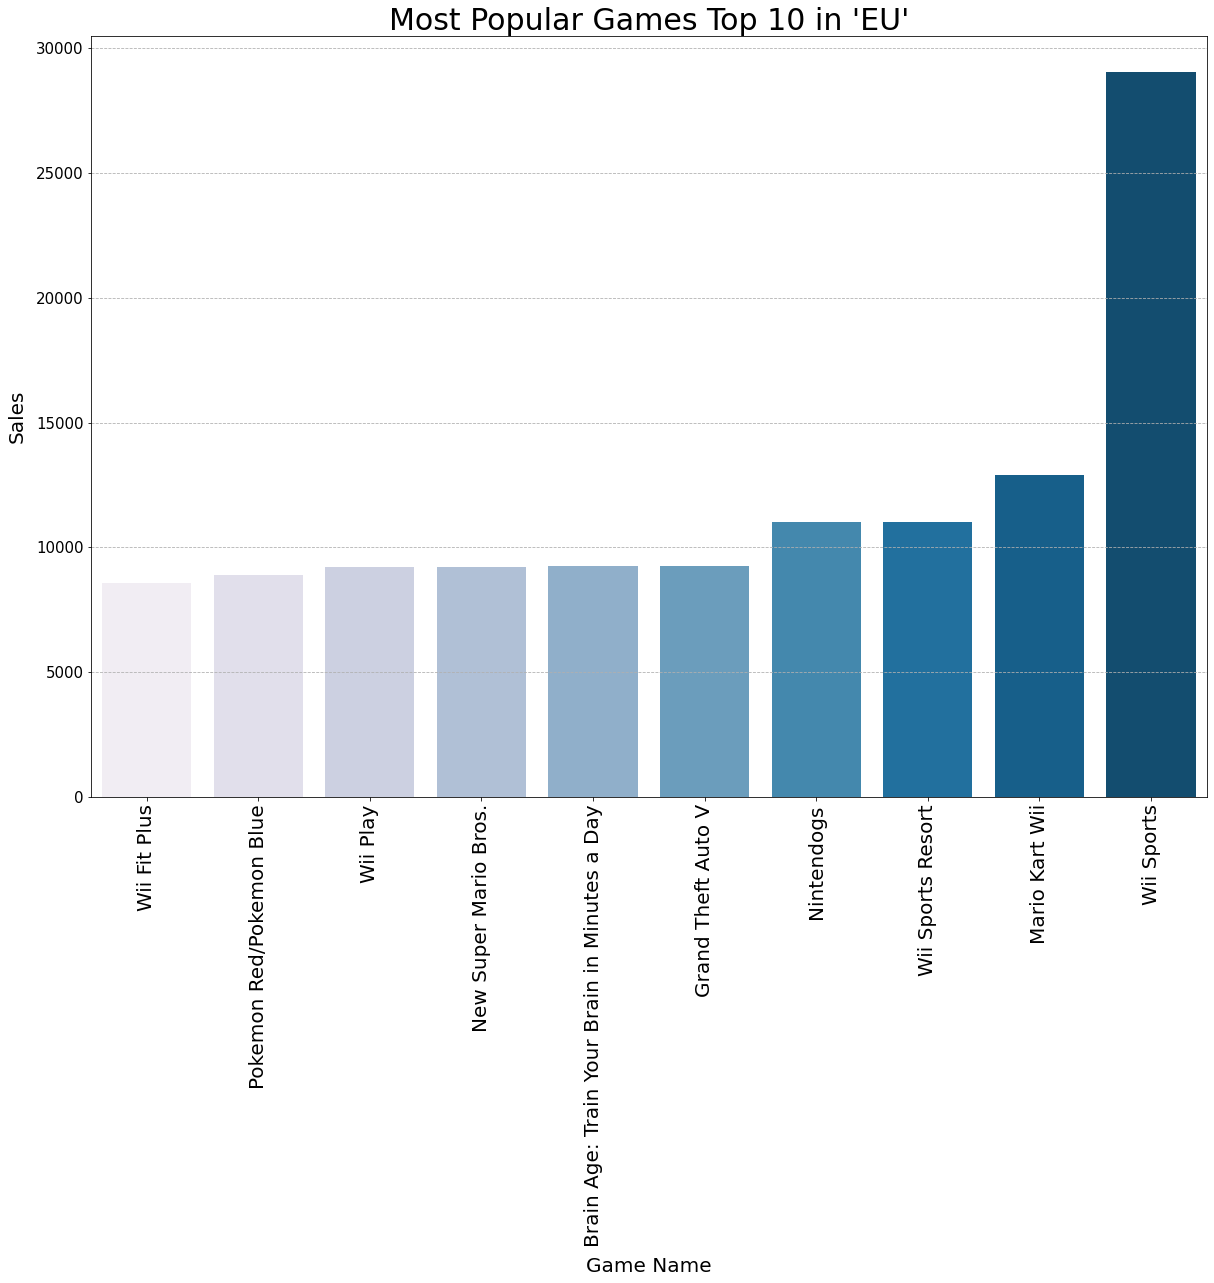

In [ ]:
palette4 = sns.color_palette("PuBu", 10)
plt.figure(figsize=(20,14))
sns.set_palette(palette4)
sns.barplot(data=best_10_sales_EU, x='Name', y='EU_Sales')
plt.grid(True, axis='y', linestyle='--')
plt.xlabel('Game Name', size=20, labelpad=10)
plt.ylabel('Sales', size=20, labelpad=10)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=15)
plt.title("Most Popular Games Top 10 in 'EU'",fontsize=30)
plt.show()

수평막대그래프

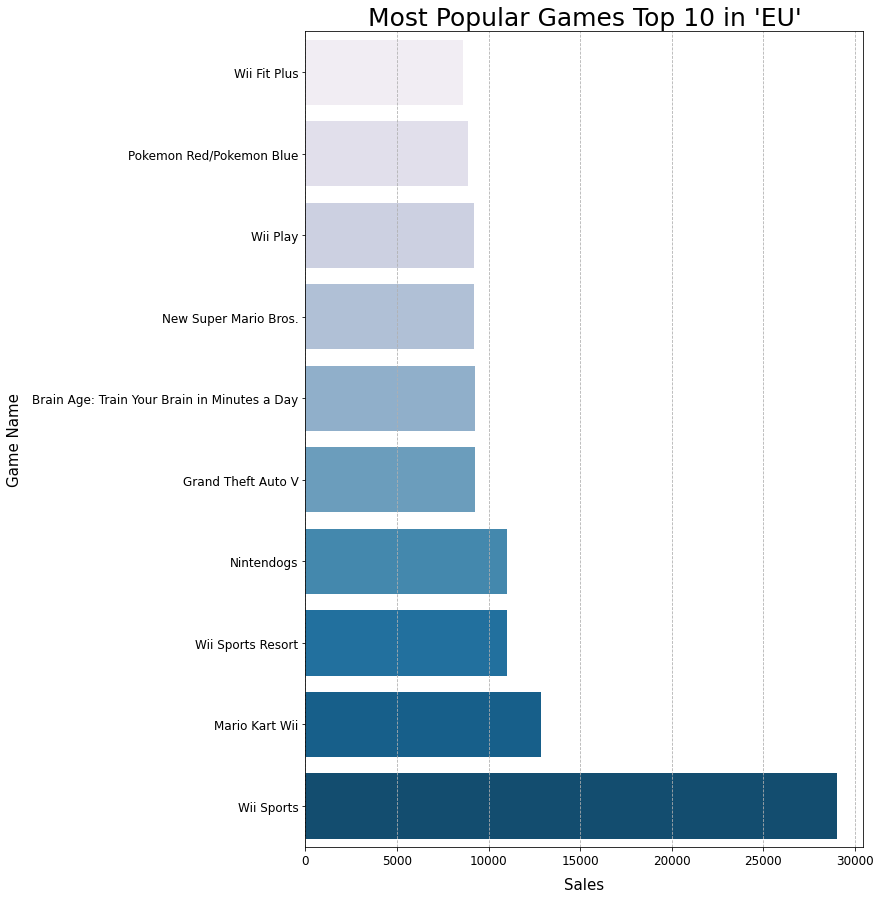

In [ ]:
palette4 = sns.color_palette("PuBu", 10)
plt.figure(figsize=(10,15))
sns.set_palette(palette4)
sns.barplot(data=best_10_sales_EU, x='EU_Sales', y='Name', orient='h')
plt.grid(True, axis='x', linestyle='--')
plt.xlabel('Sales', size=15, labelpad=10)
plt.ylabel('Game Name', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most Popular Games Top 10 in 'EU'",fontsize=25)
plt.show()

**일본 역대 인기 게임 best10**

In [ ]:
best_10_sales_JP = df.loc[df['JP_Sales'].sort_values(ascending=False).index].head(10)
best_10_sales_JP = best_10_sales_JP.sort_values(by=['JP_Sales']).reset_index(drop=True)
best_10_sales_JP

,Year,Name,Publisher,Genre,Platform,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2010,Monster Hunter Freedom 3,Capcom,Role-Playing,PlayStation Portable,1,0.0,0.0,4870.0,0.0,4870.0
1,2005,Brain Age 2: More Training in Minutes a Day,Nintendo,Puzzle,Nintendo DS,1,3440.0,5360.0,5320.0,1180.0,15300.0
2,2005,Animal Crossing: Wild World,Nintendo,Simulation,Nintendo DS,1,2550.0,3520.0,5330.0,880.0,12280.0
3,2002,Pokemon Ruby/Pokemon Sapphire,Nintendo,Role-Playing,Game Boy Advance,1,6060.0,3900.0,5380.0,500.0,15840.0
4,2010,Pokemon Black/Pokemon White,Nintendo,Role-Playing,Nintendo DS,1,5570.0,3280.0,5650.0,820.0,15320.0
5,2006,Pokemon Diamond/Pokemon Pearl,Nintendo,Role-Playing,Nintendo DS,1,6420.0,4520.0,6040.0,1370.0,18350.0
6,2006,New Super Mario Bros.,Nintendo,Platform,Nintendo DS,1,11380.0,9230.0,6500.0,2900.0,30010.0
7,1985,Super Mario Bros.,Nintendo,Platform,Nintendo Entertainment System,0,29080.0,3580.0,6810.0,770.0,40240.0
8,1999,Pokemon Gold/Pokemon Silver,Nintendo,Role-Playing,Game Boy,1,9000.0,6180.0,7200.0,710.0,23090.0
9,1996,Pokemon Red/Pokemon Blue,Nintendo,Role-Playing,Game Boy,1,11270.0,8890.0,10220.0,1000.0,31380.0


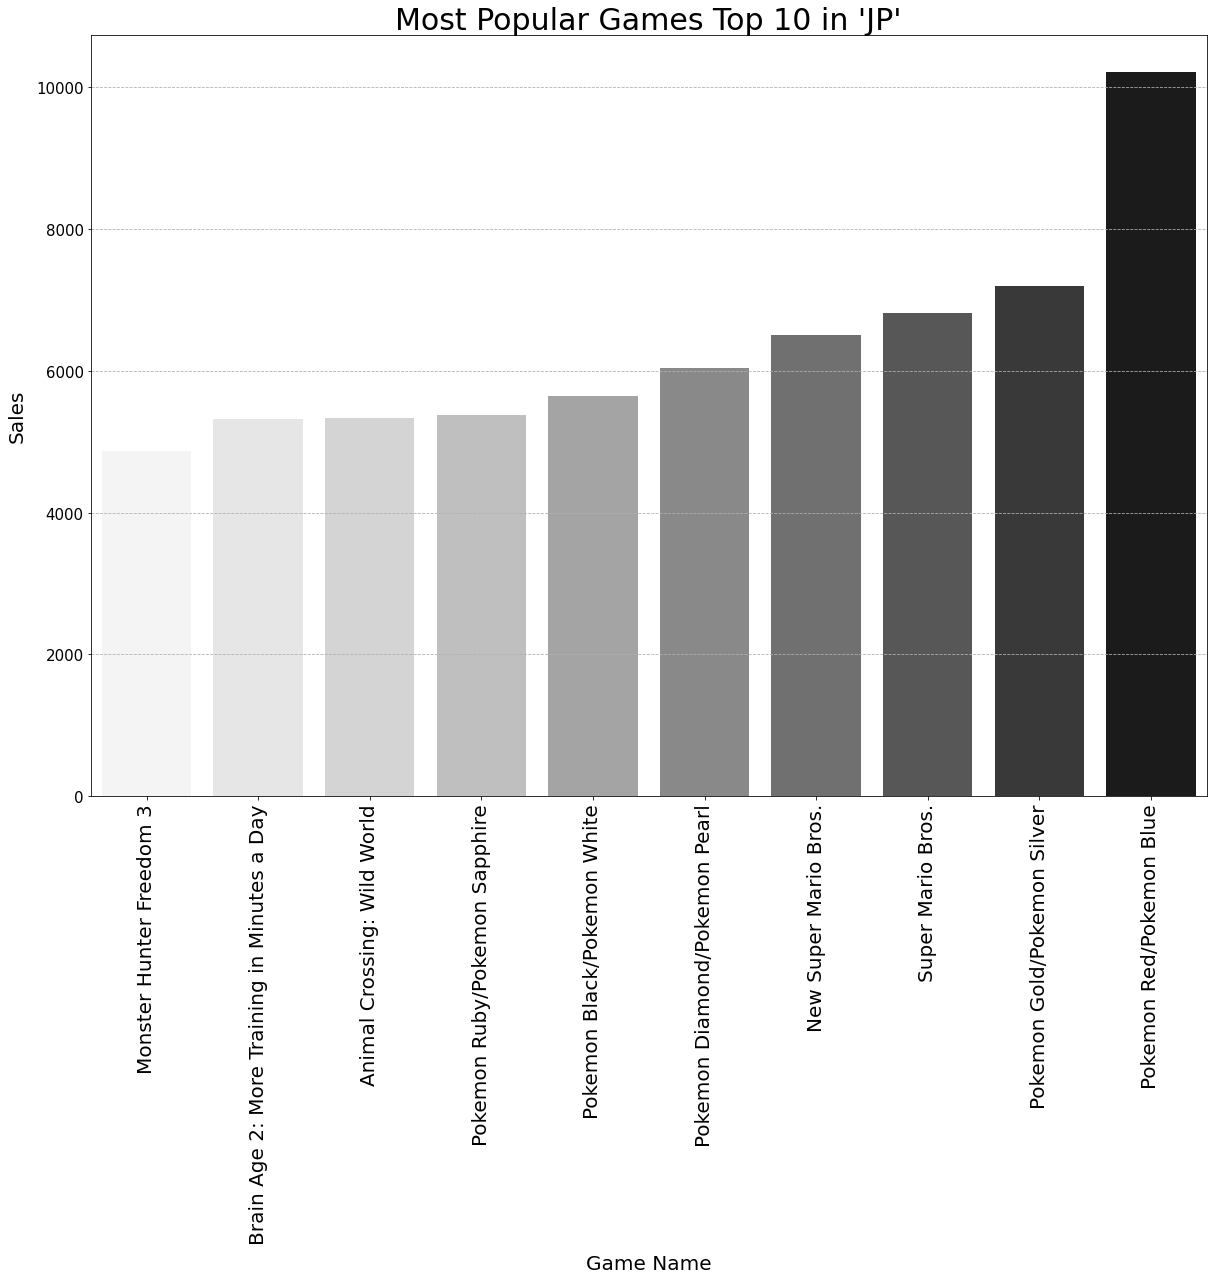

In [ ]:
palette5 = sns.color_palette("Greys", 10)
plt.figure(figsize=(20,14))
sns.set_palette(palette5)
sns.barplot(data=best_10_sales_JP, x='Name', y='JP_Sales')
plt.grid(True, axis='y', linestyle='--')
plt.xlabel('Game Name', size=20, labelpad=10)
plt.ylabel('Sales', size=20, labelpad=10)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(fontsize=15)
plt.title("Most Popular Games Top 10 in 'JP'",fontsize=30)
plt.show()

수평막대그래프

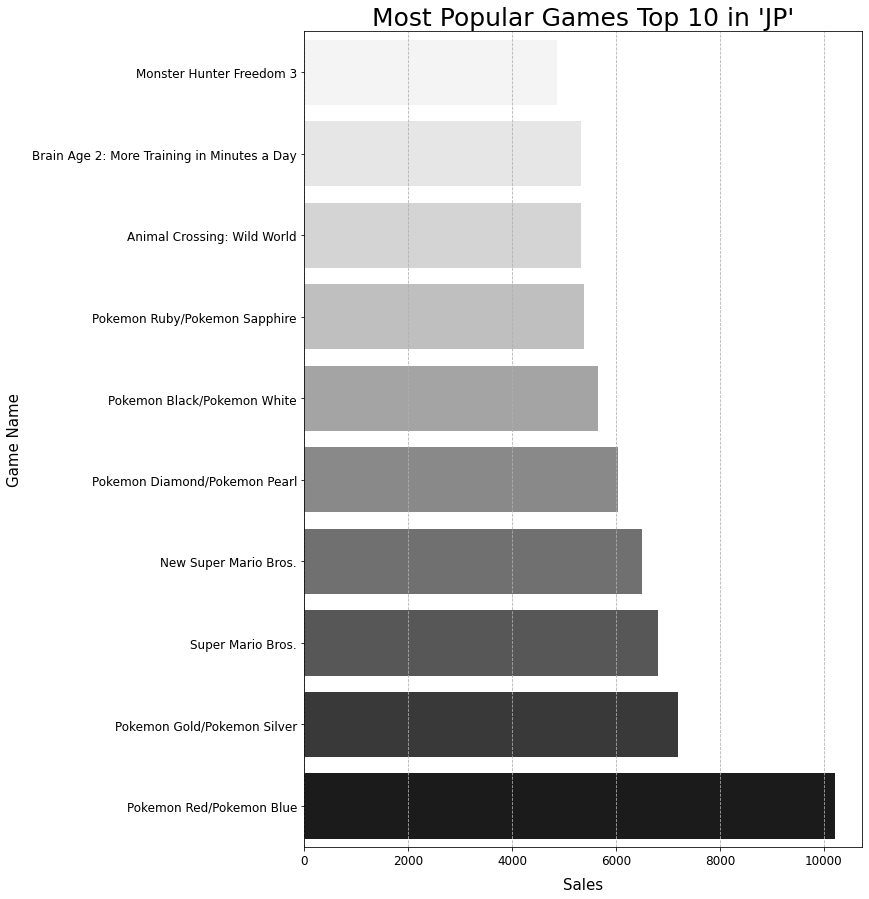

In [ ]:
palette5 = sns.color_palette("Greys", 10)
plt.figure(figsize=(10,15))
sns.set_palette(palette5)
sns.barplot(data=best_10_sales_JP, x='JP_Sales', y='Name', orient='h')
plt.grid(True, axis='x', linestyle='--')
plt.xlabel('Sales', size=15, labelpad=10)
plt.ylabel('Game Name', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most Popular Games Top 10 in 'JP'",fontsize=25)
plt.show()

**나머지 지역 역대 인기 게임 best10**

In [ ]:
best_10_sales_Other = df.loc[df['Other_Sales'].sort_values(ascending=False).index].head(10)
best_10_sales_Other = best_10_sales_Other.sort_values(by=['Other_Sales']).reset_index(drop=True)
best_10_sales_Other

,Year,Name,Publisher,Genre,Platform,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2005,Nintendogs,Nintendo,Simulation,Nintendo DS,1,9070.0,11000.0,1930.0,2750.0,24750.0
1,2006,Wii Play,Nintendo,Misc,Nintendo Wii,0,14030.0,9200.0,2930.0,2850.0,29010.0
2,2006,New Super Mario Bros.,Nintendo,Platform,Nintendo DS,1,11380.0,9230.0,6500.0,2900.0,30010.0
3,2007,Pro Evolution Soccer 2008,Konami Digital Entertainment,Sports,PlayStation2,0,50.0,0.0,640.0,2930.0,3620.0
4,2009,Wii Sports Resort,Nintendo,Sports,Nintendo Wii,0,15750.0,11010.0,3280.0,2960.0,33000.0
5,2008,Mario Kart Wii,Nintendo,Racing,Nintendo Wii,0,15850.0,12880.0,3790.0,3310.0,35830.0
6,2013,Grand Theft Auto V,Take-Two Interactive,Action,PlayStation3,0,7010.0,9270.0,970.0,4140.0,21390.0
7,2004,Gran Turismo 4,Sony Computer Entertainment,Racing,PlayStation2,0,3010.0,10.0,1100.0,7530.0,11650.0
8,2006,Wii Sports,Nintendo,Sports,Nintendo Wii,0,41490.0,29020.0,3770.0,8460.0,82740.0
9,2004,Grand Theft Auto: San Andreas,Take-Two Interactive,Action,PlayStation2,0,9430.0,400.0,410.0,10570.0,20810.0


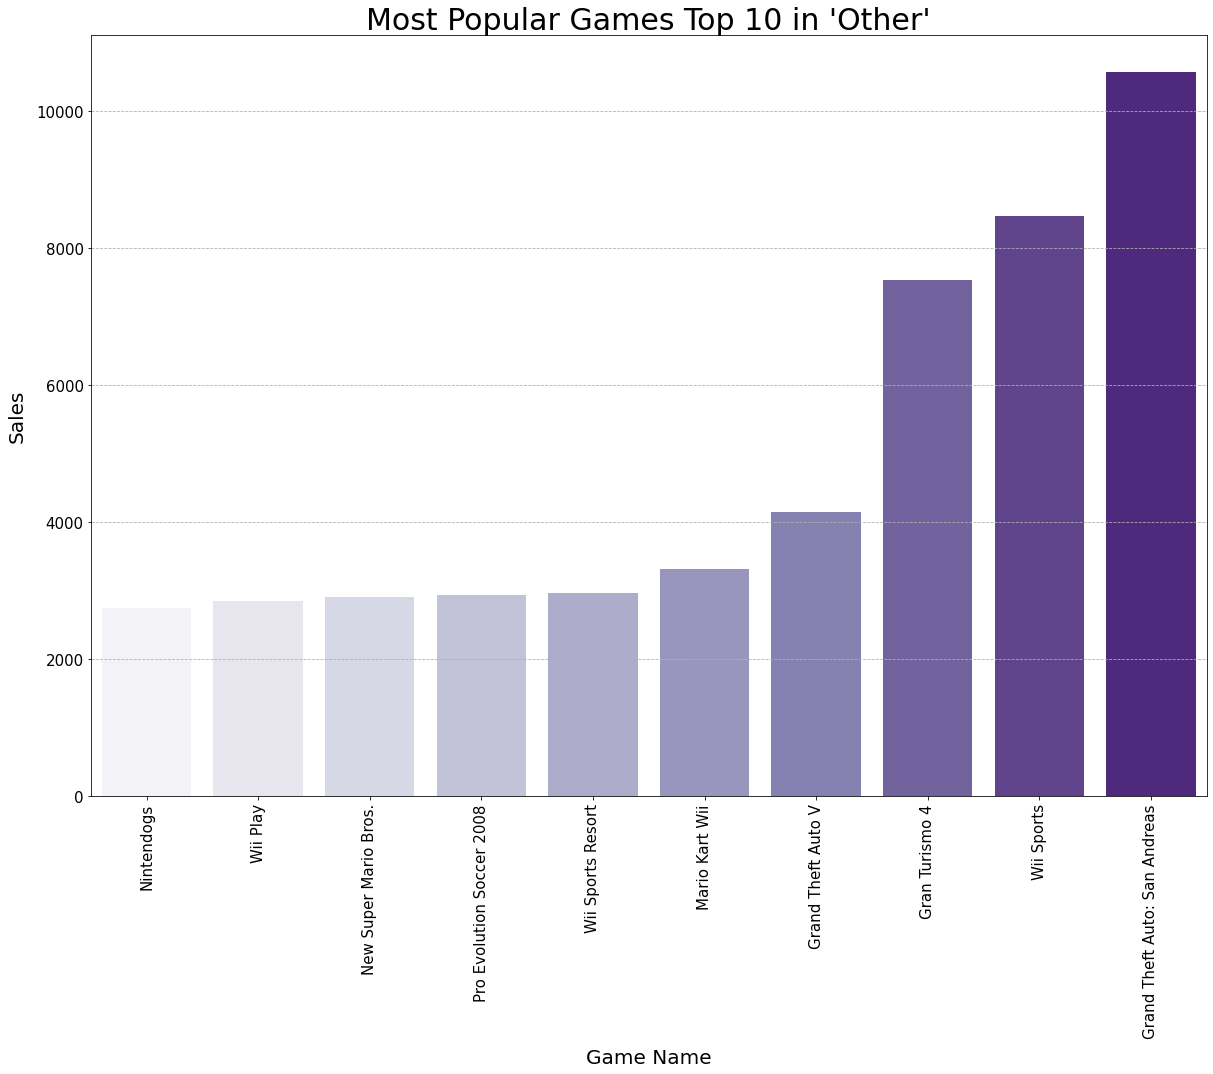

In [ ]:
palette6 = sns.color_palette("Purples", 10)
plt.figure(figsize=(20,14))
sns.set_palette(palette6)
sns.barplot(data=best_10_sales_Other, x='Name', y='Other_Sales')
plt.grid(True, axis='y', linestyle='--')
plt.xlabel('Game Name', size=20, labelpad=10)
plt.ylabel('Sales', size=20, labelpad=10)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.title("Most Popular Games Top 10 in 'Other'",fontsize=30)
plt.show()

수평막대그래프

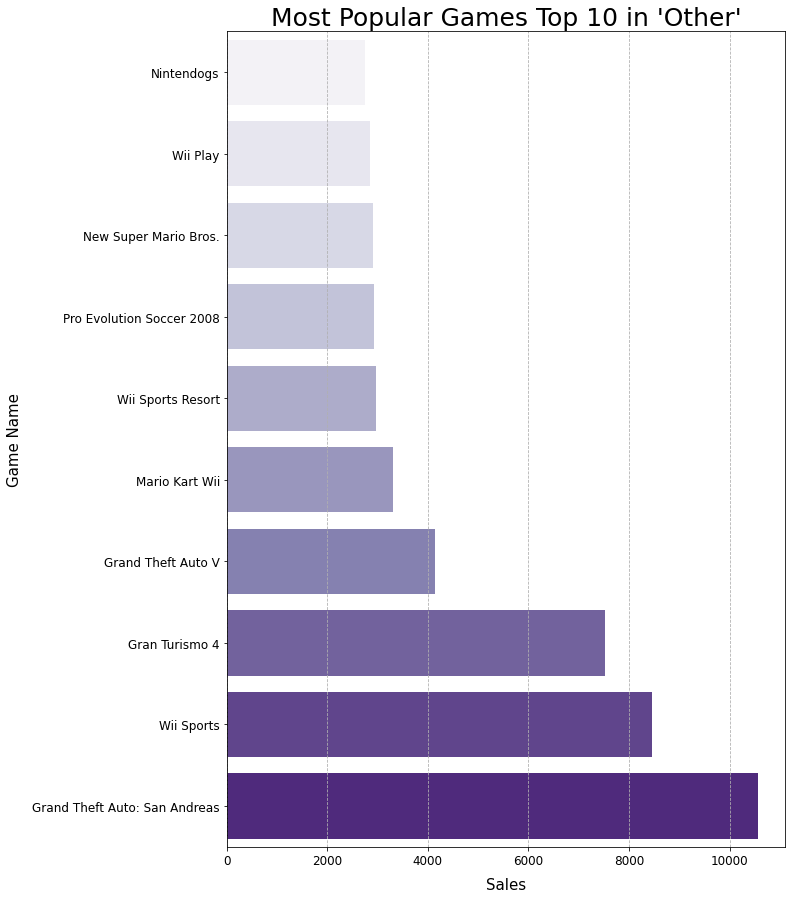

In [ ]:
palette6 = sns.color_palette("Purples", 10)
plt.figure(figsize=(10,15))
sns.set_palette(palette6)
sns.barplot(data=best_10_sales_Other, x='Other_Sales', y='Name', orient='h')
plt.grid(True, axis='x', linestyle='--')
plt.xlabel('Sales', size=15, labelpad=10)
plt.ylabel('Game Name', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most Popular Games Top 10 in 'Other'",fontsize=25)
plt.show()

# **최근 10년간의 트렌드는?**

**최근 10년간 판매량이 가장 높은 게임 10위**

In [ ]:
last_10_year = df[df['Year']>2007]
last_10_year_sales = last_10_year.sort_values('Total_Sales', ascending=False).head(10).reset_index(drop=True)
last_10_year_sales

,Year,Name,Publisher,Genre,Platform,Portable,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,2008,Mario Kart Wii,Nintendo,Racing,Nintendo Wii,0,15850.0,12880.0,3790.0,3310.0,35830.0
1,2009,Wii Sports Resort,Nintendo,Sports,Nintendo Wii,0,15750.0,11010.0,3280.0,2960.0,33000.0
2,2009,New Super Mario Bros. Wii,Nintendo,Platform,Nintendo Wii,0,14590.0,7060.0,4700.0,2260.0,28610.0
3,2009,Wii Fit Plus,Nintendo,Sports,Nintendo Wii,0,9090.0,8590.0,2530.0,1790.0,22000.0
4,2010,Kinect Adventures!,Microsoft Game Studios,Misc,Xbox 360,0,14970.0,4940.0,240.0,1670.0,21820.0
5,2013,Grand Theft Auto V,Take-Two Interactive,Action,PlayStation3,0,7010.0,9270.0,970.0,4140.0,21390.0
6,2013,Grand Theft Auto V,Take-Two Interactive,Action,Xbox 360,0,9630.0,5310.0,60.0,1380.0,16380.0
7,2010,Pokemon Black/Pokemon White,Nintendo,Role-Playing,Nintendo DS,1,5570.0,3280.0,5650.0,820.0,15320.0
8,2011,Call of Duty: Modern Warfare 3,Activision,Shooter,Xbox 360,0,9030.0,4280.0,130.0,1320.0,14760.0
9,2010,Call of Duty: Black Ops,Activision,Shooter,Xbox 360,0,9670.0,3730.0,110.0,1130.0,14640.0


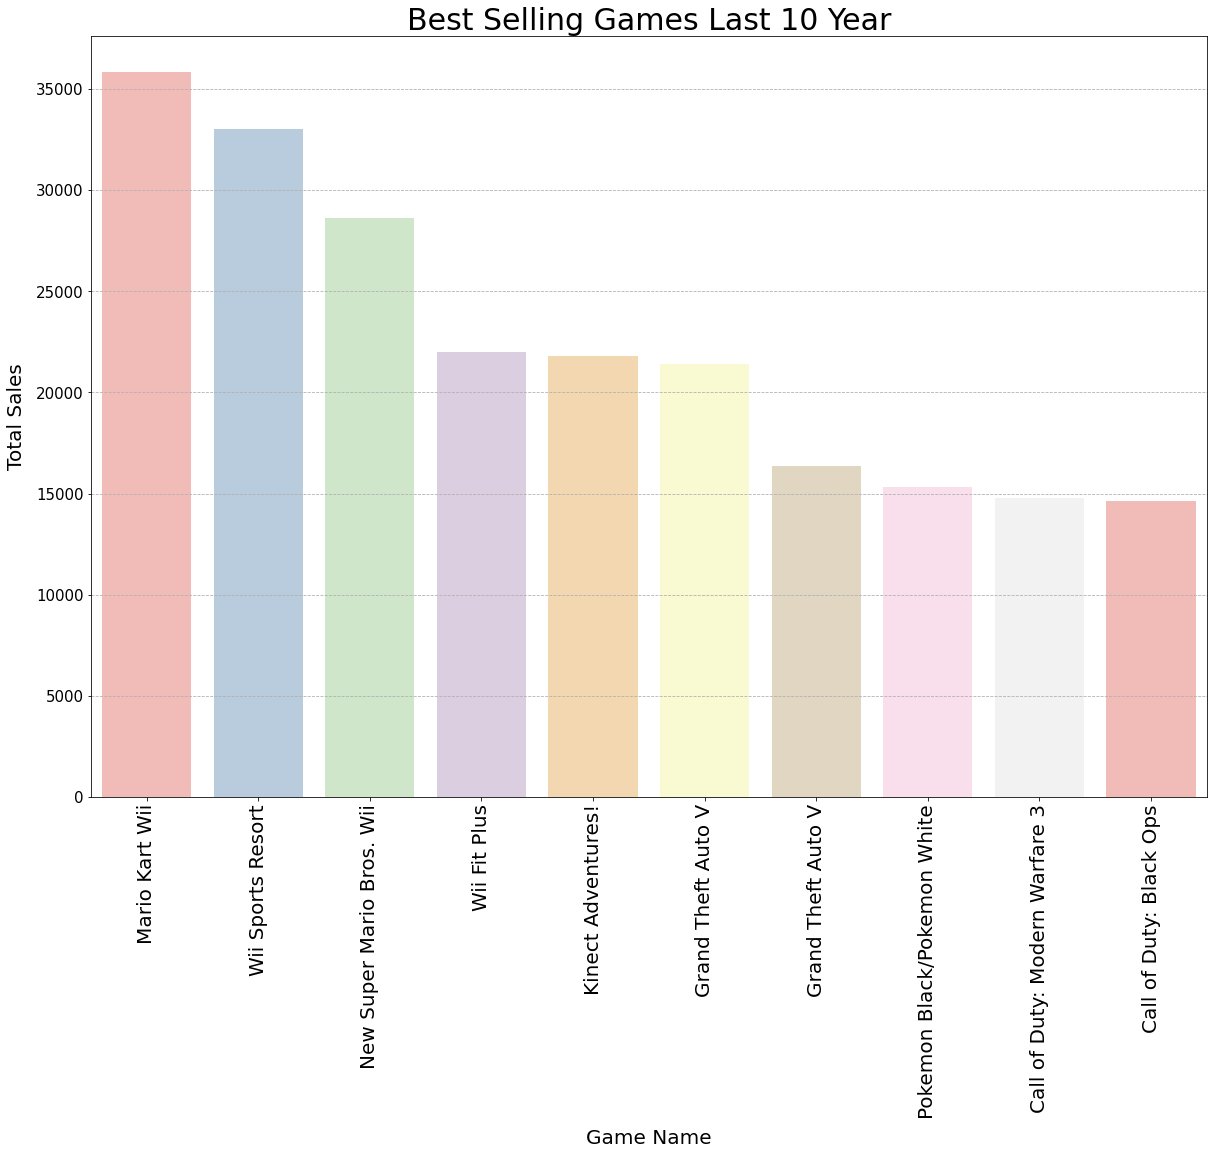

In [ ]:
palette7 = sns.color_palette("Pastel1", 10)
plt.figure(figsize=(20,14))
sns.set_palette(palette7)
sns.barplot(data=last_10_year_sales, x=last_10_year_sales.index, y='Total_Sales')
plt.grid(True, axis='y', linestyle='--')
plt.xlabel('Game Name', size=20, labelpad=10)
plt.ylabel('Total Sales', size=20, labelpad=10)
plt.xticks(range(10), labels = [l for l in last_10_year_sales['Name']],rotation=90, fontsize=20)
plt.yticks(fontsize=15)
plt.title('Best Selling Games Last 10 Year',fontsize=30)
plt.show()

수평막대그래프

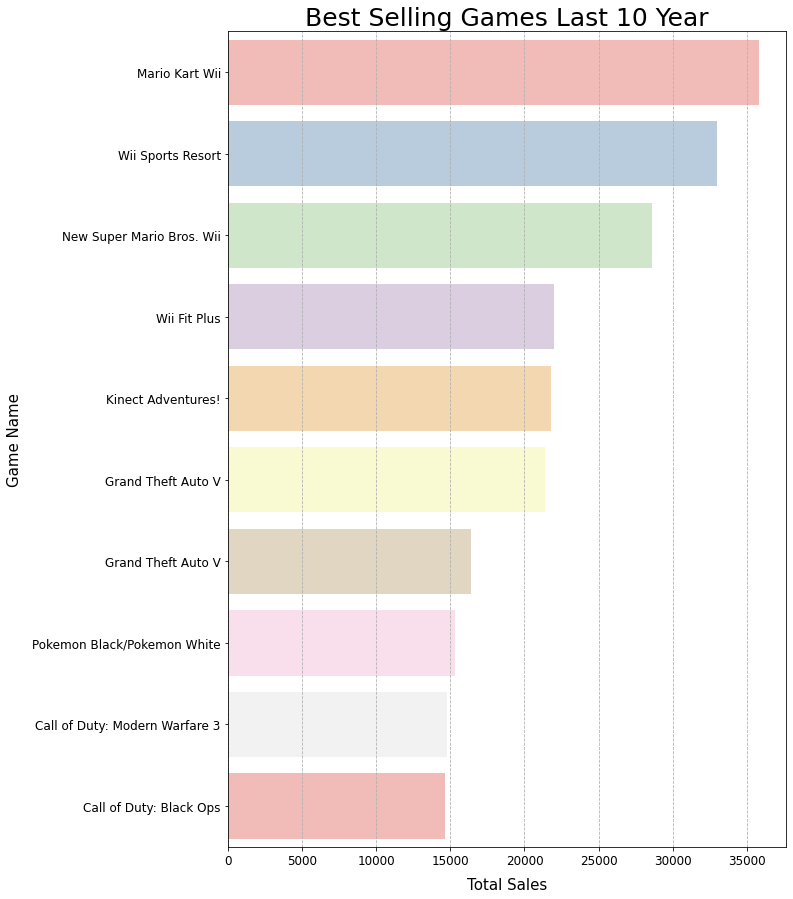

In [ ]:
palette7 = sns.color_palette("Pastel1", 10)
plt.figure(figsize=(10,15))
sns.set_palette(palette7)
sns.barplot(data=last_10_year_sales, x='Total_Sales', y=last_10_year_sales.index, orient='h')
plt.grid(True, axis='x', linestyle='--')
plt.xlabel('Total Sales', size=15, labelpad=10)
plt.ylabel('Game Name', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(range(10), labels = [l for l in last_10_year_sales['Name']], fontsize=12)
plt.title('Best Selling Games Last 10 Year',fontsize=25)
plt.show()

**최근 10년간 판매량이 가장 높은 게임 10위 중 가정용콘솔과 휴대용콘솔 비율**

In [ ]:
last_10_year_port = last_10_year_sales.groupby('Portable')['Total_Sales'].size().reset_index()
last_10_year_port

,Portable,Total_Sales
0,0,9
1,1,1


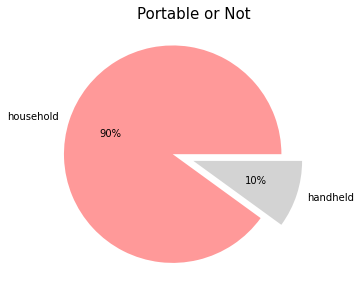

In [ ]:
plt.figure(figsize=(5,5))
labels=['household','handheld']
explode = (0.2,0)
colors = ['#ff9999', 'lightgray']
plt.pie(last_10_year_port['Total_Sales'], labels=labels, autopct='%1.0f%%', explode=explode, colors=colors)
plt.title('Portable or Not', fontsize=15)
plt.show()

**판매량 top10 게임의 장르 비율**

In [ ]:
last_10_year_sales_g = last_10_year_sales.groupby('Genre').size().reset_index(name='count')
last_10_year_sales_g

,Genre,count
0,Action,2
1,Misc,1
2,Platform,1
3,Racing,1
4,Role-Playing,1
5,Shooter,2
6,Sports,2


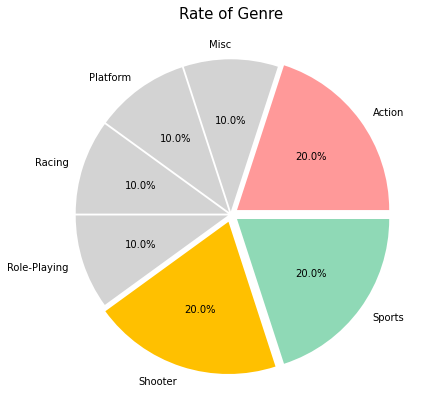

In [ ]:
plt.figure(figsize=(7,7))
labels=['Action','Misc','Platform','Racing','Role-Playing','Shooter','Sports']
explode = (0.05,0.02,0.02,0.02,0.02,0.05,0.05)
colors = ['#ff9999', 'lightgray','lightgray','lightgray','lightgray','#ffc000','#8fd9b6']
plt.pie(last_10_year_sales_g['count'], labels=labels, autopct='%1.1f%%', explode=explode, colors=colors)
plt.title('Rate of Genre', fontsize=15)
plt.show()

**최근 10년 동안 출시량이 많은 장르**

In [ ]:
last_10_year_gen = last_10_year.groupby('Genre').size().reset_index(name='count')
last_10_year_gen

,Genre,count
0,Action,1926
1,Adventure,846
2,Fighting,306
3,Misc,978
4,Platform,241
5,Puzzle,259
6,Racing,399
7,Role-Playing,772
8,Shooter,569
9,Simulation,449


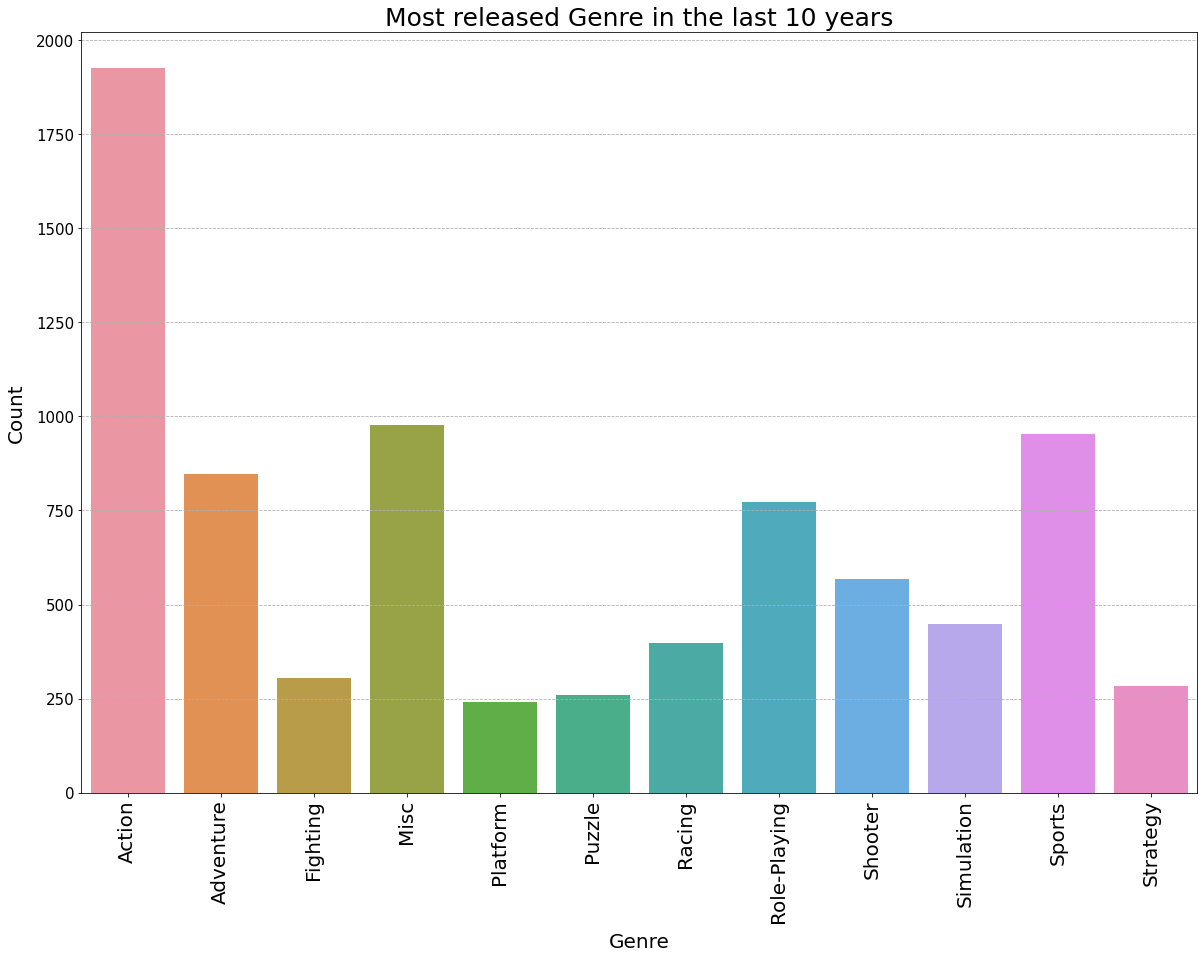

In [ ]:
plt.figure(figsize=(20,14))
sns.set_palette(palette7)
sns.barplot(data=last_10_year_gen, x='Genre', y='count')
plt.grid(True, axis='y',linestyle='--')
plt.xlabel('Genre', size=20, labelpad=10)
plt.ylabel('Count', size=20, labelpad=10)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=15)
plt.title("Most released Genre in the last 10 years",fontsize=25)
plt.show()

수평막대그래프

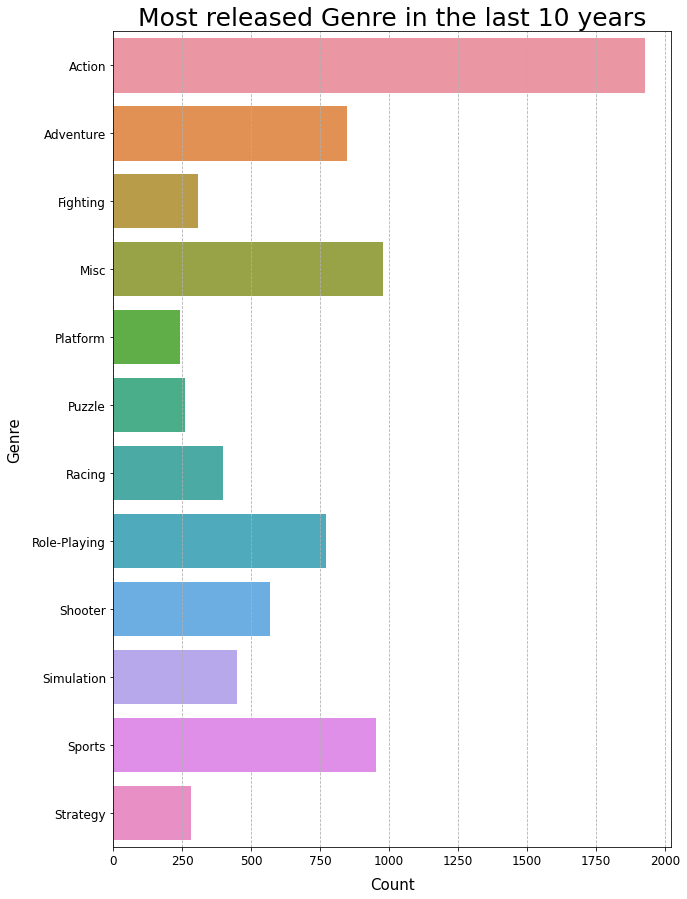

In [ ]:
plt.figure(figsize=(10,15))
sns.set_palette(palette7)
sns.barplot(data=last_10_year_gen, x='count', y='Genre', orient='h')
plt.grid(True, axis='x',linestyle='--')
plt.xlabel('Count', size=15, labelpad=10)
plt.ylabel('Genre', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most released Genre in the last 10 years",fontsize=25)
plt.show()

**최근 10년동안 가장 판매량이 높았던 장르**

In [ ]:
last_10_year_tot = last_10_year.groupby('Genre')['Total_Sales'].sum().reset_index()
last_10_year_tot 

,Genre,Total_Sales
0,Action,943420.0
1,Adventure,106450.0
2,Fighting,149120.0
3,Misc,392380.0
4,Platform,197350.0
5,Puzzle,57000.0
6,Racing,228470.0
7,Role-Playing,398950.0
8,Shooter,591990.0
9,Simulation,150930.0


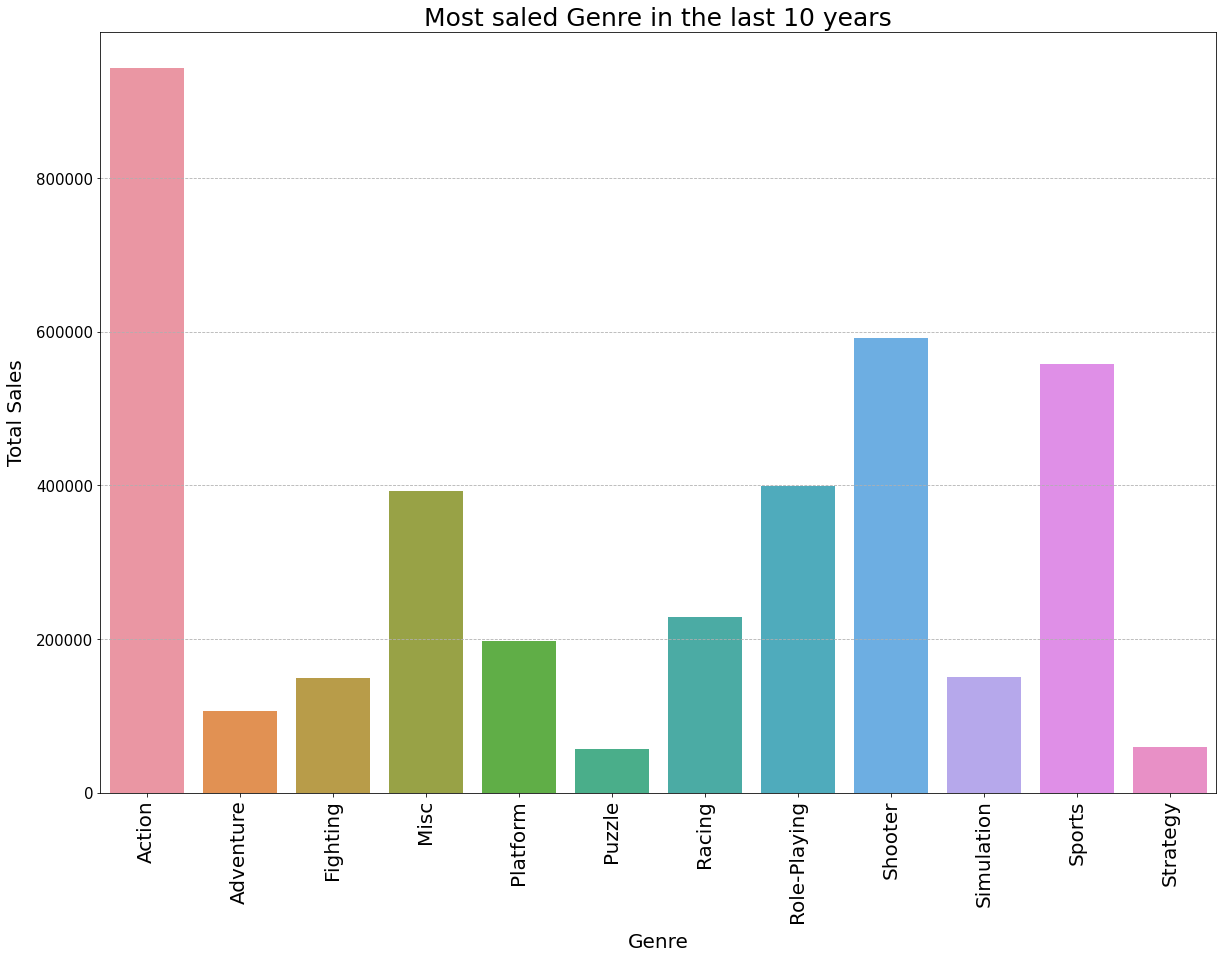

In [ ]:
palette9 = sns.color_palette("Paired", 10)
plt.figure(figsize=(20,14))
sns.set_palette(palette9)
sns.barplot(data=last_10_year_tot, x='Genre', y='Total_Sales')
plt.grid(True, axis='y',linestyle='--')
plt.xlabel('Genre', size=20, labelpad=10)
plt.ylabel('Total Sales', size=20, labelpad=10)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=15)
plt.title("Most saled Genre in the last 10 years",fontsize=25)
plt.show()

수평막대그래프

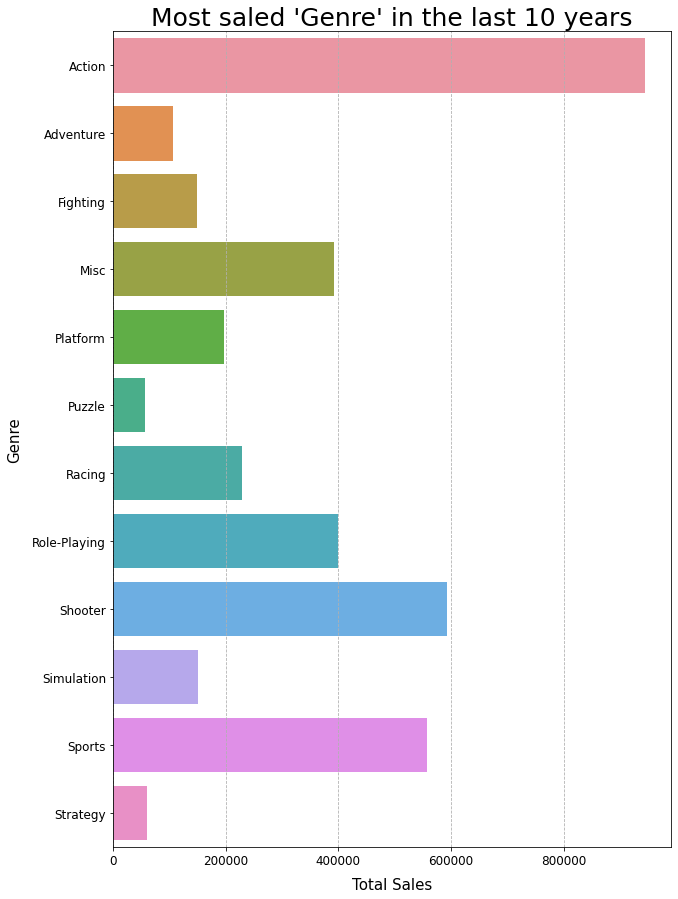

In [ ]:
palette9 = sns.color_palette("Paired", 10)
plt.figure(figsize=(10,15))
sns.set_palette(palette9)
sns.barplot(data=last_10_year_tot, x='Total_Sales', y='Genre',orient='h')
plt.grid(True, axis='x',linestyle='--')
plt.xlabel('Total Sales', size=15, labelpad=10)
plt.ylabel('Genre', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most saled 'Genre' in the last 10 years",fontsize=25)
plt.show()

**최근 10년동안 가장 판매량이 높았던 플랫폼**

In [ ]:
last_10_year_plat = last_10_year.groupby('Platform')['Total_Sales'].sum().reset_index()
last_10_year_plat 

,Platform,Total_Sales
0,Dreamcast,40.0
1,Nintendo 3DS,231830.0
2,Nintendo DS,398350.0
3,Nintendo Wii,607700.0
4,Nintendo Wii U,81790.0
5,PC,148610.0
6,PlayStation Portable,137170.0
7,PlayStation Vita,61590.0
8,PlayStation2,85260.0
9,PlayStation3,852110.0


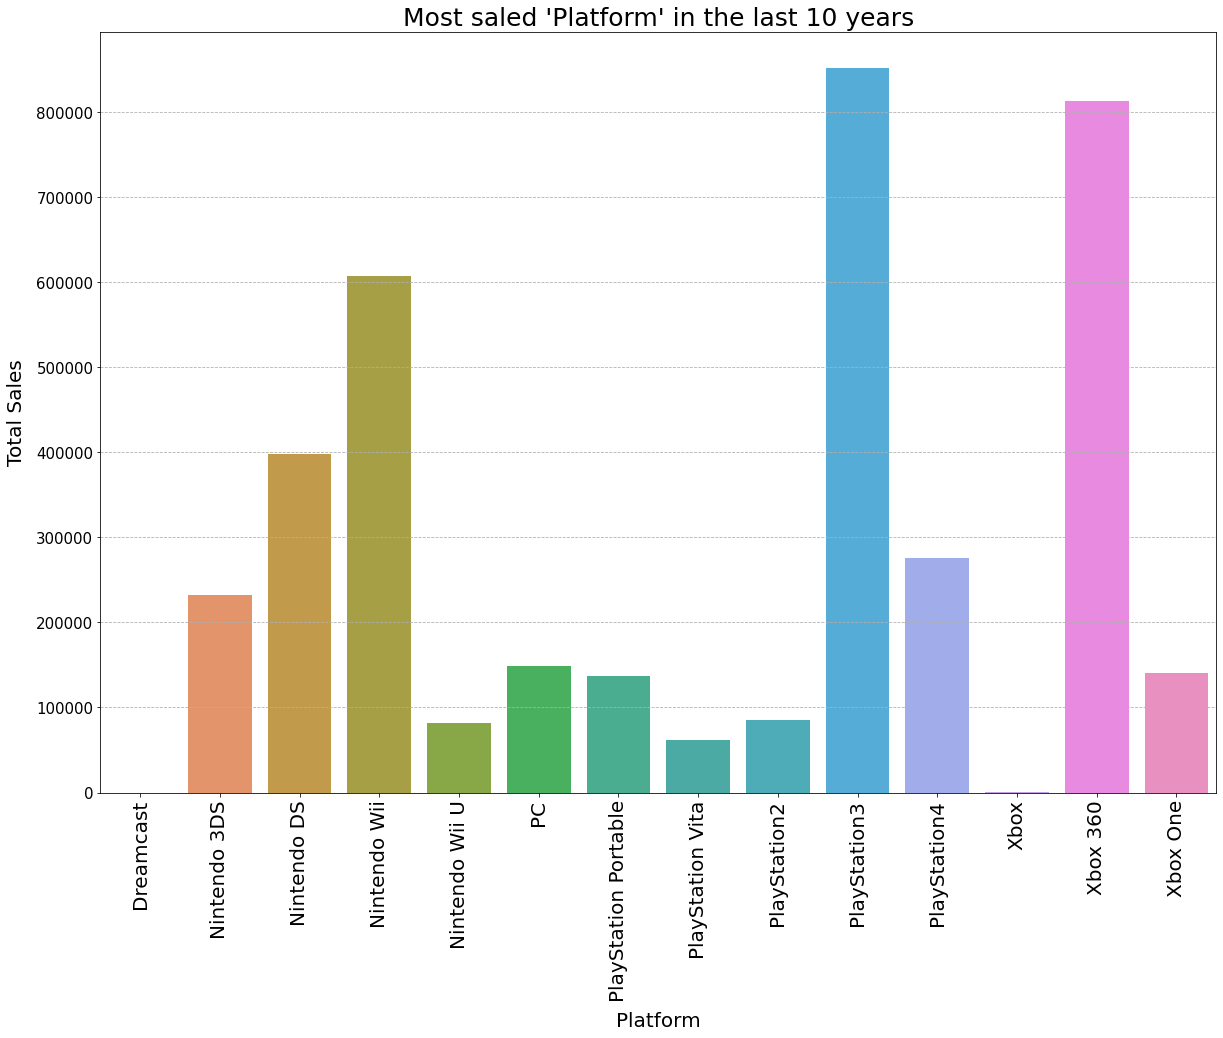

In [ ]:
plt.figure(figsize=(20,14))
sns.set_palette(palette9)
sns.barplot(data=last_10_year_plat, x='Platform', y='Total_Sales')
plt.grid(True, axis='y',linestyle='--')
plt.xlabel('Platform', size=20, labelpad=10)
plt.ylabel('Total Sales', size=20, labelpad=10)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(fontsize=15)
plt.title("Most saled 'Platform' in the last 10 years",fontsize=25)
plt.show()

수평막대그래프

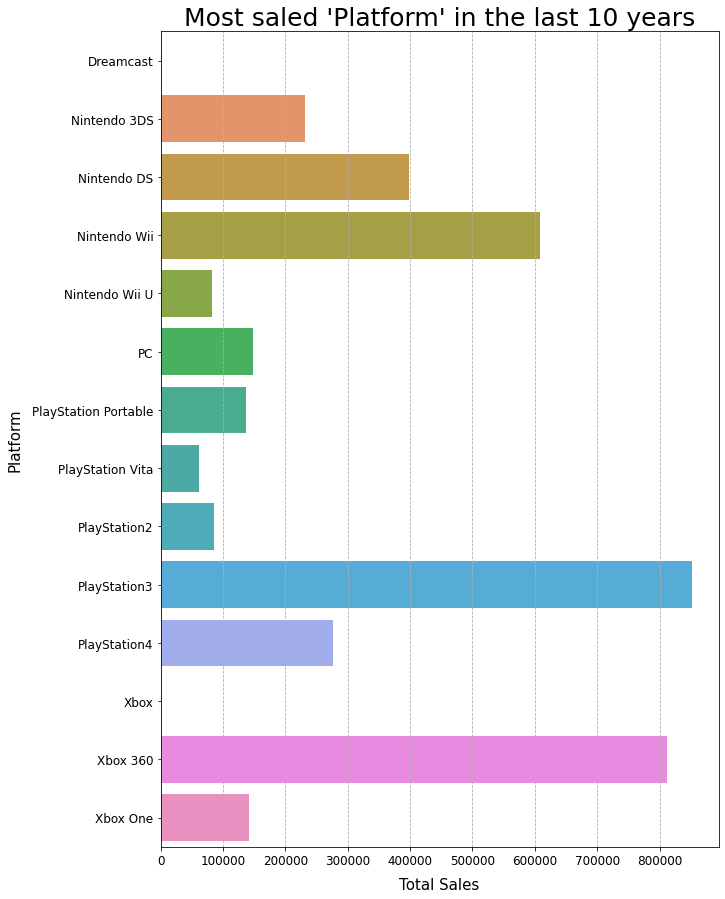

In [ ]:
plt.figure(figsize=(10,15))
sns.set_palette(palette9)
sns.barplot(data=last_10_year_plat, x='Total_Sales', y='Platform', orient='h')
plt.grid(True, axis='x',linestyle='--')
plt.xlabel('Total Sales', size=15, labelpad=10)
plt.ylabel('Platform', size=15, labelpad=10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most saled 'Platform' in the last 10 years",fontsize=25)
plt.show()

**최근 10년동안 가장 판매량이 높았던 플랫폼 중 가정용과 휴대용 비율**



In [ ]:
last_10_year_port2 = last_10_year.groupby(['Platform','Portable'])['Total_Sales'].sum().reset_index()
last_10_year_port2 = last_10_year_port2.groupby('Portable').size().reset_index(name='count')
last_10_year_port2

,Portable,count
0,0,10
1,1,4


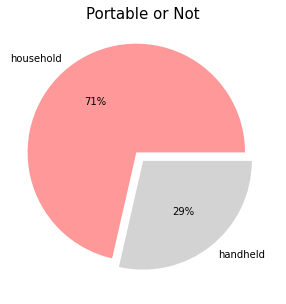

In [ ]:
plt.figure(figsize=(5,5))
labels=['household','handheld']
explode = (0.1,0)
colors = ['#ff9999', 'lightgray']
plt.pie(last_10_year_port2['count'], labels=labels, autopct='%1.0f%%', explode=explode, colors=colors)
plt.title('Portable or Not', fontsize=15)
plt.show()